<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sport-Vouchers-Program-Analysis" data-toc-modified-id="Sport-Vouchers-Program-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sport Vouchers Program Analysis</a></span><ul class="toc-item"><li><span><a href="#Description-of-voucher-data:" data-toc-modified-id="Description-of-voucher-data:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Description of voucher data:</a></span></li><li><span><a href="#Description-of-seifa-data:" data-toc-modified-id="Description-of-seifa-data:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Description of seifa data:</a></span></li><li><span><a href="#For-later-visualisation-purposes,-LGA-map-data-will-be-read-into-the-notebook" data-toc-modified-id="For-later-visualisation-purposes,-LGA-map-data-will-be-read-into-the-notebook-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>For later visualisation purposes, LGA map data will be read into the notebook</a></span></li></ul></li><li><span><a href="#Describe-the-distribution-of-vouchers-by:-LGA,-Sport---which-regions/sports-stand-out?" data-toc-modified-id="Describe-the-distribution-of-vouchers-by:-LGA,-Sport---which-regions/sports-stand-out?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out?</a></span><ul class="toc-item"><li><span><a href="#By-LGA" data-toc-modified-id="By-LGA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>By LGA</a></span></li><li><span><a href="#By-Sports" data-toc-modified-id="By-Sports-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>By Sports</a></span></li></ul></li><li><span><a href="#Are-some-sports-more-popular-in-different-parts-of-the-state?" data-toc-modified-id="Are-some-sports-more-popular-in-different-parts-of-the-state?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Are some sports more popular in different parts of the state?</a></span><ul class="toc-item"><li><span><a href="#Plot-Voucher-distribution-on-Map" data-toc-modified-id="Plot-Voucher-distribution-on-Map-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot Voucher distribution on Map</a></span></li></ul></li><li><span><a href="#Are-any-LGAs-over/under-represented-in-their-use-of-vouchers?" data-toc-modified-id="Are-any-LGAs-over/under-represented-in-their-use-of-vouchers?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Are any LGAs over/under represented in their use of vouchers?</a></span></li><li><span><a href="#Is-there-a-relationship-between-any-of-the-SEIFA-measures-and-voucher-use-in-an-LGA?" data-toc-modified-id="Is-there-a-relationship-between-any-of-the-SEIFA-measures-and-voucher-use-in-an-LGA?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Is there a relationship between any of the SEIFA measures and voucher use in an LGA?</a></span><ul class="toc-item"><li><span><a href="#Conduct-bivariate-analysis-of-variables-with-target-variable" data-toc-modified-id="Conduct-bivariate-analysis-of-variables-with-target-variable-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Conduct bivariate analysis of variables with target variable</a></span></li></ul></li><li><span><a href="#Challenge---Queensland" data-toc-modified-id="Challenge---Queensland-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge - Queensland</a></span></li><li><span><a href="#To-Do" data-toc-modified-id="To-Do-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>To Do</a></span><ul class="toc-item"><li><span><a href="#LGA-Name-Mitigation" data-toc-modified-id="LGA-Name-Mitigation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>LGA Name Mitigation</a></span></li><li><span><a href="#Sports-Name-Alignment" data-toc-modified-id="Sports-Name-Alignment-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Sports Name Alignment</a></span></li></ul></li></ul></div>

# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGAs over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers

Participant_ID Participant_Suburb       Club_Previous_Member  \
0              1000002     ABERFOYLE PARK      Registered Previously   
1              1000002     ABERFOYLE PARK      Registered Previously   
2              1000004     ABERFOYLE PARK  Not Registered Previously   
3              1000004     ABERFOYLE PARK      Registered Previously   
4              1000005     ABERFOYLE PARK      Registered Previously   
...                ...                ...                        ...   
127521         1127524     ZADOWS LANDING      Registered Previously   
127522         1127524     ZADOWS LANDING      Registered Previously   
127523         1127524     ZADOWS LANDING      Registered Previously   
127524         1127526     ZADOWS LANDING      Registered Previously   
127525         1127526     ZADOWS LANDING      Registered Previously   

       Participant_ATSI_Indicator Participant_CALD_Indicator Participant_Sex  \
0                        Not ATSI                   Not CALD            Male   
1                        Not ATSI                   Not CALD            Male   
2                        Not ATSI                   Not CALD          Female   
3                        Not ATSI                   Not CALD          Female   
4                        Not ATSI                   Not CALD          Female   
...                           ...                        ...             ...   
127521                   Not ATSI                   Not CALD          Female   
127522                   Not ATSI                   Not CALD          Female   
127523                   Not ATSI                   Not CALD          Female   
127524                   Not ATSI                   Not CALD          Female   
127525                   Not ATSI                   Not CALD          Female   

        Voucher_Value                                   Club_Name  \
0                  50                Flagstaff Hill Football Club   
1                  50                Flagstaff Hill Football Club   
2                  50                         Hub Gymnastics Club   
3                  50                         Hub Gymnastics Club   
4                  50  Blackwood Community Recreation Association   
...               ...                                         ...   
127521             50                    Mannum Roos Netball Club   
127522             50                    Mannum Roos Netball Club   
127523             50                    Mannum Roos Netball Club   
127524             50                    Mannum Roos Netball Club   
127525             50                    Mannum Roos Netball Club   

           Voucher_Sport Participant_LGA Participant_Electorate  \
0       Australian Rules     ONKAPARINGA                 FISHER   
1       Australian Rules     ONKAPARINGA                 FISHER   
2             Gymnastics     ONKAPARINGA                 FISHER   
3             Gymnastics     ONKAPARINGA                 FISHER   
4             Gymnastics     ONKAPARINGA                 FISHER   
...                  ...             ...                    ...   
127521           Netball      MID MURRAY               SCHUBERT   
127522           Netball      MID MURRAY               SCHUBERT   
127523           Netball      MID MURRAY               SCHUBERT   
127524           Netball      MID MURRAY               SCHUBERT   
127525           Netball      MID MURRAY               SCHUBERT   

       Voucher_Completion_Date  Voucher_Claim_Year  
0                 26/6/15 1:19                2015  
1                29/6/16 23:55                2016  
2                 21/4/16 3:37                2016  
3                 30/3/17 0:47                2017  
4                 20/7/15 2:50                2015  
...                        ...                 ...  
127521            15/8/16 1:33                2016  
127522           13/7/15 23:42                2015  
127523            30/6/17 6:07                2017  
127524            

In [3]:
sa_vouchers[sa_vouchers['Participant_LGA'] == 'ADELAIDE PLAINS']

Participant_ID Participant_Suburb       Club_Previous_Member  \
6954           1006955            BARABBA  Not Registered Previously   
6955           1006956            BARABBA  Not Registered Previously   
6956           1006957            BARABBA      Registered Previously   
6957           1006960            BARABBA  Not Registered Previously   
6958           1006960            BARABBA      Registered Previously   
...                ...                ...                        ...   
123703         1123704            WINDSOR  Not Registered Previously   
123704         1123705            WINDSOR      Registered Previously   
123705         1123706            WINDSOR  Not Registered Previously   
123706         1123707            WINDSOR  Not Registered Previously   
123707         1123708            WINDSOR  Not Registered Previously   

       Participant_ATSI_Indicator Participant_CALD_Indicator Participant_Sex  \
6954                     Not ATSI                   Not CALD            Male   
6955                     Not ATSI                   Not CALD            Male   
6956                     Not ATSI                   Not CALD          Female   
6957                     Not ATSI                   Not CALD            Male   
6958                     Not ATSI                   Not CALD            Male   
...                           ...                        ...             ...   
123703                   Not ATSI                   Not CALD            Male   
123704                   Not ATSI                   Not CALD          Female   
123705                   Not ATSI                   Not CALD          Female   
123706                   Not ATSI                   Not CALD            Male   
123707                   Not ATSI                   Not CALD            Male   

        Voucher_Value                                     Club_Name  \
6954               50                                     S.A.N.F.L   
6955               50                         Mallala Football Club   
6956               50                          Mallala Netball Club   
6957               50                   Hamley Bridge Football Club   
6958               50                                     S.A.N.F.L   
...               ...                                           ...   
123703             50                                     S.A.N.F.L   
123704             50                          Mallala Netball Club   
123705             50                      Long Plains Netball Club   
123706             50                                     S.A.N.F.L   
123707             50  Two Wells Football and Netball Sporting Club   

           Voucher_Sport  Participant_LGA Participant_Electorate  \
6954    Australian Rules  ADELAIDE PLAINS                 GOYDER   
6955    Australian Rules  ADELAIDE PLAINS                 GOYDER   
6956             Netball  ADELAIDE PLAINS                 GOYDER   
6957    Australian Rules  ADELAIDE PLAINS                 GOYDER   
6958    Australian Rules  ADELAIDE PLAINS                 GOYDER   
...                  ...              ...                    ...   
123703  Australian Rules  ADELAIDE PLAINS                 GOYDER   
123704           Netball  ADELAIDE PLAINS                 GOYDER   
123705           Netball  ADELAIDE PLAINS                 GOYDER   
123706  Australian Rules  ADELAIDE PLAINS                 GOYDER   
123707  Australian Rules  ADELAIDE PLAINS                 GOYDER   

       Voucher_Completion_Date  Voucher_Claim_Year  
6954              30/3/17 0:46                2017  
6955              14/9/15 5:20                2015  
6956              30/3/17 0:37                2017  
6957              28/8/15 2:28                2015  
6958              17/6/16 1:03                2016  
...                        ...                 ...  
123703            17/6/16 1:03                2016  
123704            30/5/17 7:58                2017  
123705            25/2/16 2:23     

In [4]:
sa_vouchers[sa_vouchers['Participant_LGA'].str.contains('ANANGU', regex=True)]

Empty DataFrame
Columns: [Participant_ID, Participant_Suburb, Club_Previous_Member, Participant_ATSI_Indicator, Participant_CALD_Indicator, Participant_Sex, Voucher_Value, Club_Name, Voucher_Sport, Participant_LGA, Participant_Electorate, Voucher_Completion_Date, Voucher_Claim_Year]
Index: []

In [5]:
sa_vouchers[sa_vouchers['Participant_LGA'].str.contains('MARALINGA', regex=True)]

Empty DataFrame
Columns: [Participant_ID, Participant_Suburb, Club_Previous_Member, Participant_ATSI_Indicator, Participant_CALD_Indicator, Participant_Sex, Voucher_Value, Club_Name, Voucher_Sport, Participant_LGA, Participant_Electorate, Voucher_Completion_Date, Voucher_Claim_Year]
Index: []

Note: the following operation is done because of an insight later in the analysis to align the LGA names between seifa and voucher data.

In [6]:
sa_vouchers['Participant_LGA'] = sa_vouchers['Participant_LGA'].replace({'ADELAIDE PLAINS':'MALLALA'})
sa_vouchers[sa_vouchers['Participant_LGA'] == 'ADELAIDE PLAINS']

Empty DataFrame
Columns: [Participant_ID, Participant_Suburb, Club_Previous_Member, Participant_ATSI_Indicator, Participant_CALD_Indicator, Participant_Sex, Voucher_Value, Club_Name, Voucher_Sport, Participant_LGA, Participant_Electorate, Voucher_Completion_Date, Voucher_Claim_Year]
Index: []

The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

__Note:__ in a later analysis, it has been seen that some population values did not match their respective LGA. This is due to the fact that there are LGAs from Australia and not only from South Australia in the SEIFA data. There are different LGAs with the same name from different states and different population amount. Hence the data will be filtered for all LGAs from South Australia only. Since all LGAs in South Australia start with the digit 4, this identifier will be used to filter the data.

In [7]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
seifa = seifa[seifa['LGA_2011'].astype(str).str[0] == '4'].reset_index()
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMTGEeg]+\)', '', regex=True).str.upper()
seifa['LGA'] = lga
seifa

index  LGA_2011 Local Government Areas - 2011 INDEX_TYPE  \
0      1228     40070                  Adelaide (C)      IRSAD   
1      1229     40070                  Adelaide (C)      IRSAD   
2      1230     40070                  Adelaide (C)      IRSAD   
3      1231     40070                  Adelaide (C)      IRSAD   
4      1232     40120           Adelaide Hills (DC)      IRSAD   
...     ...       ...                           ...        ...   
1131   8275     48830          Yorke Peninsula (DC)        IEO   
1132   8276     49399             Unincorporated SA        IEO   
1133   8277     49399             Unincorporated SA        IEO   
1134   8278     49399             Unincorporated SA        IEO   
1135   8279     49399             Unincorporated SA        IEO   

                                             Index Type MEASURE  \
0     Index of Relative Socio-economic Advantage and...   SCORE   
1     Index of Relative Socio-economic Advantage and...    MINS   
2     Index of Relative Socio-economic Advantage and...    MAXS   
3     Index of Relative Socio-economic Advantage and...     URP   
4     Index of Relative Socio-economic Advantage and...   SCORE   
...                                                 ...     ...   
1131                  Index of Education and Occupation     URP   
1132                  Index of Education and Occupation   SCORE   
1133                  Index of Education and Occupation    MINS   
1134                  Index of Education and Occupation    MAXS   
1135                  Index of Education and Occupation     URP   

                             Measure  Value                LGA  
0                              Score   1036           ADELAIDE  
1     Minimum score for SA1s in area    909           ADELAIDE  
2     Maximum score for SA1s in area   1141           ADELAIDE  
3          Usual resident population  19606           ADELAIDE  
4                              Score   1077     ADELAIDE HILLS  
...                              ...    ...                ...  
1131       Usual resident population  11046    YORKE PENINSULA  
1132                           Score    911  UNINCORPORATED SA  
1133  Minimum score for SA1s in area    585  UNINCORPORATED SA  
1134  Maximum score for SA1s in area   1121  UNINCORPORATED SA  
1135       Usual resident population   4433  UNINCORPORATED SA  

[1136 rows x 9 columns]

Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [8]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores

INDEX_TYPE              IEO   IER  IRSAD  IRSD  Population
LGA                                                       
ADELAIDE                874   874   1036  1013       19606
ADELAIDE HILLS         1083  1083   1077  1081       38601
ALEXANDRINA            1000  1000    969   987       23693
ANANGU PITJANTJATJARA   623   623    672   593        2433
BAROSSA                1028  1028    997  1017       22174
...                     ...   ...    ...   ...         ...
WEST TORRENS            949   949    989   998       54932
WHYALLA                 905   905    897   905       22070
WUDINNA                1008  1008    999  1023        1256
YANKALILLA              990   990    957   972        4406
YORKE PENINSULA         969   969    933   952       11046

[71 rows x 5 columns]

This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [9]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores

Participant_ID Participant_Suburb       Club_Previous_Member  \
0              1000002     ABERFOYLE PARK      Registered Previously   
1              1000002     ABERFOYLE PARK      Registered Previously   
2              1000004     ABERFOYLE PARK  Not Registered Previously   
3              1000004     ABERFOYLE PARK      Registered Previously   
4              1000005     ABERFOYLE PARK      Registered Previously   
...                ...                ...                        ...   
127521         1127524     ZADOWS LANDING      Registered Previously   
127522         1127524     ZADOWS LANDING      Registered Previously   
127523         1127524     ZADOWS LANDING      Registered Previously   
127524         1127526     ZADOWS LANDING      Registered Previously   
127525         1127526     ZADOWS LANDING      Registered Previously   

       Participant_ATSI_Indicator Participant_CALD_Indicator Participant_Sex  \
0                        Not ATSI                   Not CALD            Male   
1                        Not ATSI                   Not CALD            Male   
2                        Not ATSI                   Not CALD          Female   
3                        Not ATSI                   Not CALD          Female   
4                        Not ATSI                   Not CALD          Female   
...                           ...                        ...             ...   
127521                   Not ATSI                   Not CALD          Female   
127522                   Not ATSI                   Not CALD          Female   
127523                   Not ATSI                   Not CALD          Female   
127524                   Not ATSI                   Not CALD          Female   
127525                   Not ATSI                   Not CALD          Female   

        Voucher_Value                                   Club_Name  \
0                  50                Flagstaff Hill Football Club   
1                  50                Flagstaff Hill Football Club   
2                  50                         Hub Gymnastics Club   
3                  50                         Hub Gymnastics Club   
4                  50  Blackwood Community Recreation Association   
...               ...                                         ...   
127521             50                    Mannum Roos Netball Club   
127522             50                    Mannum Roos Netball Club   
127523             50                    Mannum Roos Netball Club   
127524             50                    Mannum Roos Netball Club   
127525             50                    Mannum Roos Netball Club   

           Voucher_Sport Participant_LGA Participant_Electorate  \
0       Australian Rules     ONKAPARINGA                 FISHER   
1       Australian Rules     ONKAPARINGA                 FISHER   
2             Gymnastics     ONKAPARINGA                 FISHER   
3             Gymnastics     ONKAPARINGA                 FISHER   
4             Gymnastics     ONKAPARINGA                 FISHER   
...                  ...             ...                    ...   
127521           Netball      MID MURRAY               SCHUBERT   
127522           Netball      MID MURRAY               SCHUBERT   
127523           Netball      MID MURRAY               SCHUBERT   
127524           Netball      MID MURRAY               SCHUBERT   
127525           Netball      MID MURRAY               SCHUBERT   

       Voucher_Completion_Date  Voucher_Claim_Year    IEO    IER  IRSAD  \
0                 26/6/15 1:19                2015  996.0  996.0  975.0   
1                29/6/16 23:55                2016  996.0  996.0  975.0   
2                 21/4/16 3:37                2016  996.0  996.0  975.0   
3                 30/3/17 0:47                2017  996.0  996.0  975.0   
4                 20/7/15 2:50                2015  996.0  996.0  975.0   
...                        ...                 ...    ...    ...    ...   
127521            15/8/

In [10]:
NANs = sa_vouchers_scores[sa_vouchers_scores['IEO'].isnull()]['Participant_LGA'].drop_duplicates()
NANs = list(NANs)
NANs

['NO LGA',
 'BERRI BARMERA',
 'NARACOORTE LUCINDALE',
 'PORT PIRIE',
 'NORWOOD PAYNEHAM AND ST PETERS']

In [11]:
seifa[seifa['LGA'].str.contains('NO LGA', regex=True)]

Empty DataFrame
Columns: [index, LGA_2011, Local Government Areas - 2011, INDEX_TYPE, Index Type, MEASURE, Measure, Value, LGA]
Index: []

The assumption is that 'NO LGA' is 'Unincorporated'.

In [12]:
seifa[seifa['LGA'].str.contains('ADELAIDE', regex=True)]

index  LGA_2011 Local Government Areas - 2011 INDEX_TYPE  \
0      1228     40070                  Adelaide (C)      IRSAD   
1      1229     40070                  Adelaide (C)      IRSAD   
2      1230     40070                  Adelaide (C)      IRSAD   
3      1231     40070                  Adelaide (C)      IRSAD   
4      1232     40120           Adelaide Hills (DC)      IRSAD   
5      1233     40120           Adelaide Hills (DC)      IRSAD   
6      1234     40120           Adelaide Hills (DC)      IRSAD   
7      1235     40120           Adelaide Hills (DC)      IRSAD   
180    1408     45890     Port Adelaide Enfield (C)      IRSAD   
181    1409     45890     Port Adelaide Enfield (C)      IRSAD   
182    1410     45890     Port Adelaide Enfield (C)      IRSAD   
183    1411     45890     Port Adelaide Enfield (C)      IRSAD   
284    3484     40070                  Adelaide (C)       IRSD   
285    3485     40070                  Adelaide (C)       IRSD   
286    3486     40070                  Adelaide (C)       IRSD   
287    3487     40070                  Adelaide (C)       IRSD   
288    3488     40120           Adelaide Hills (DC)       IRSD   
289    3489     40120           Adelaide Hills (DC)       IRSD   
290    3490     40120           Adelaide Hills (DC)       IRSD   
291    3491     40120           Adelaide Hills (DC)       IRSD   
464    3664     45890     Port Adelaide Enfield (C)       IRSD   
465    3665     45890     Port Adelaide Enfield (C)       IRSD   
466    3666     45890     Port Adelaide Enfield (C)       IRSD   
467    3667     45890     Port Adelaide Enfield (C)       IRSD   
568    5740     40070                  Adelaide (C)        IER   
569    5741     40070                  Adelaide (C)        IER   
570    5742     40070                  Adelaide (C)        IER   
571    5743     40070                  Adelaide (C)        IER   
572    5744     40120           Adelaide Hills (DC)        IER   
573    5745     40120           Adelaide Hills (DC)        IER   
574    5746     40120           Adelaide Hills (DC)        IER   
575    5747     40120           Adelaide Hills (DC)        IER   
748    5920     45890     Port Adelaide Enfield (C)        IER   
749    5921     45890     Port Adelaide Enfield (C)        IER   
750    5922     45890     Port Adelaide Enfield (C)        IER   
751    5923     45890     Port Adelaide Enfield (C)        IER   
852    7996     40070                  Adelaide (C)        IEO   
853    7997     40070                  Adelaide (C)        IEO   
854    7998     40070                  Adelaide (C)        IEO   
855    7999     40070                  Adelaide (C)        IEO   
856    8000     40120           Adelaide Hills (DC)        IEO   
857    8001     40120           Adelaide Hills (DC)        IEO   
858    8002     40120           Adelaide Hills (DC)        IEO   
859    8003     40120           Adelaide Hills (DC)        IEO   
1032   8176     45890     Port Adelaide Enfield (C)        IEO   
1033   8177     45890     Port Adelaide Enfield (C)        IEO   
1034   8178     45890     Port Adelaide Enfield (C)        IEO   
1035   8179     45890     Port Adelaide Enfield (C)        IEO   

                                             Index Type MEASURE  \
0     Index of Relative Socio-economic Advantage and...   SCORE   
1     Index of Relative Socio-economic Advantage and...    MINS   
2     Index of Relative Socio-economic Advantage and...    MAXS   
3     Index of Relative Socio-economic Advantage and...     URP   
4     Index of Relative Socio-economic Advantage and...   SCORE   
5     Index of Relative Socio-economic Advantage and...    MINS   
6     Index of Relative Socio-economic Advantage and...    MAXS   
7     Index of Relative Socio-economic Advantage and...     URP   
180   Index of Relative Socio-economic Advantage and...   SCORE   
181   Index of Relative Socio-economic Advantage and...    MINS   
182   Index of Relative Socio-econ

Research revealed that Adelaide Plains is a council in Mallala. In the following, it will be queried whether this LGA exists in the Seifa data. If yes, Adelaide Plains should be replaced by Mallala.

In [13]:
seifa[seifa['LGA'].str.contains('MALLALA', regex=True)]

index  LGA_2011 Local Government Areas - 2011 INDEX_TYPE  \
116   1344     43920                  Mallala (DC)      IRSAD   
117   1345     43920                  Mallala (DC)      IRSAD   
118   1346     43920                  Mallala (DC)      IRSAD   
119   1347     43920                  Mallala (DC)      IRSAD   
400   3600     43920                  Mallala (DC)       IRSD   
401   3601     43920                  Mallala (DC)       IRSD   
402   3602     43920                  Mallala (DC)       IRSD   
403   3603     43920                  Mallala (DC)       IRSD   
684   5856     43920                  Mallala (DC)        IER   
685   5857     43920                  Mallala (DC)        IER   
686   5858     43920                  Mallala (DC)        IER   
687   5859     43920                  Mallala (DC)        IER   
968   8112     43920                  Mallala (DC)        IEO   
969   8113     43920                  Mallala (DC)        IEO   
970   8114     43920                  Mallala (DC)        IEO   
971   8115     43920                  Mallala (DC)        IEO   

                                            Index Type MEASURE  \
116  Index of Relative Socio-economic Advantage and...   SCORE   
117  Index of Relative Socio-economic Advantage and...    MINS   
118  Index of Relative Socio-economic Advantage and...    MAXS   
119  Index of Relative Socio-economic Advantage and...     URP   
400      Index of Relative Socio-economic Disadvantage   SCORE   
401      Index of Relative Socio-economic Disadvantage    MINS   
402      Index of Relative Socio-economic Disadvantage    MAXS   
403      Index of Relative Socio-economic Disadvantage     URP   
684                        Index of Economic Resources   SCORE   
685                        Index of Economic Resources    MINS   
686                        Index of Economic Resources    MAXS   
687                        Index of Economic Resources     URP   
968                  Index of Education and Occupation   SCORE   
969                  Index of Education and Occupation    MINS   
970                  Index of Education and Occupation    MAXS   
971                  Index of Education and Occupation     URP   

                            Measure  Value      LGA  
116                           Score    962  MALLALA  
117  Minimum score for SA1s in area    843  MALLALA  
118  Maximum score for SA1s in area   1034  MALLALA  
119       Usual resident population   8333  MALLALA  
400                           Score    980  MALLALA  
401  Minimum score for SA1s in area    850  MALLALA  
402  Maximum score for SA1s in area   1044  MALLALA  
403       Usual resident population   8333  MALLALA  
684                           Score   1035  MALLALA  
685  Minimum score for SA1s in area    932  MALLALA  
686  Maximum score for SA1s in area   1093  MALLALA  
687       Usual resident population   8333  MALLALA  
968                           Score   1035  MALLALA  
969  Minimum score for SA1s in area    932  MALLALA  
970  Maximum score for SA1s in area   1093  MALLALA  
971       Usual resident population   8333  MALLALA

In [14]:
seifa[seifa['LGA'].str.contains('BERRI', regex=True)]

index  LGA_2011 Local Government Areas - 2011 INDEX_TYPE  \
24    1252     40520        Berri and Barmera (DC)      IRSAD   
25    1253     40520        Berri and Barmera (DC)      IRSAD   
26    1254     40520        Berri and Barmera (DC)      IRSAD   
27    1255     40520        Berri and Barmera (DC)      IRSAD   
308   3508     40520        Berri and Barmera (DC)       IRSD   
309   3509     40520        Berri and Barmera (DC)       IRSD   
310   3510     40520        Berri and Barmera (DC)       IRSD   
311   3511     40520        Berri and Barmera (DC)       IRSD   
592   5764     40520        Berri and Barmera (DC)        IER   
593   5765     40520        Berri and Barmera (DC)        IER   
594   5766     40520        Berri and Barmera (DC)        IER   
595   5767     40520        Berri and Barmera (DC)        IER   
876   8020     40520        Berri and Barmera (DC)        IEO   
877   8021     40520        Berri and Barmera (DC)        IEO   
878   8022     40520        Berri and Barmera (DC)        IEO   
879   8023     40520        Berri and Barmera (DC)        IEO   

                                            Index Type MEASURE  \
24   Index of Relative Socio-economic Advantage and...   SCORE   
25   Index of Relative Socio-economic Advantage and...    MINS   
26   Index of Relative Socio-economic Advantage and...    MAXS   
27   Index of Relative Socio-economic Advantage and...     URP   
308      Index of Relative Socio-economic Disadvantage   SCORE   
309      Index of Relative Socio-economic Disadvantage    MINS   
310      Index of Relative Socio-economic Disadvantage    MAXS   
311      Index of Relative Socio-economic Disadvantage     URP   
592                        Index of Economic Resources   SCORE   
593                        Index of Economic Resources    MINS   
594                        Index of Economic Resources    MAXS   
595                        Index of Economic Resources     URP   
876                  Index of Education and Occupation   SCORE   
877                  Index of Education and Occupation    MINS   
878                  Index of Education and Occupation    MAXS   
879                  Index of Education and Occupation     URP   

                            Measure  Value                LGA  
24                            Score    899  BERRI AND BARMERA  
25   Minimum score for SA1s in area    760  BERRI AND BARMERA  
26   Maximum score for SA1s in area   1019  BERRI AND BARMERA  
27        Usual resident population  10590  BERRI AND BARMERA  
308                           Score    904  BERRI AND BARMERA  
309  Minimum score for SA1s in area    739  BERRI AND BARMERA  
310  Maximum score for SA1s in area   1037  BERRI AND BARMERA  
311       Usual resident population  10590  BERRI AND BARMERA  
592                           Score    927  BERRI AND BARMERA  
593  Minimum score for SA1s in area    765  BERRI AND BARMERA  
594  Maximum score for SA1s in area   1047  BERRI AND BARMERA  
595       Usual resident population  10590  BERRI AND BARMERA  
876                           Score    927  BERRI AND BARMERA  
877  Minimum score for SA1s in area    765  BERRI AND BARMERA  
878  Maximum score for SA1s in area   1047  BERRI AND BARMERA  
879       Usual resident population  10590  BERRI AND BARMERA

Hence Berri and Barmera should be replaced by Berri Barmera.

In [15]:
seifa[seifa['LGA'].str.contains('NARACOORTE', regex=True)]

index  LGA_2011  Local Government Areas - 2011 INDEX_TYPE  \
152    1380     45090  Naracoorte and Lucindale (DC)      IRSAD   
153    1381     45090  Naracoorte and Lucindale (DC)      IRSAD   
154    1382     45090  Naracoorte and Lucindale (DC)      IRSAD   
155    1383     45090  Naracoorte and Lucindale (DC)      IRSAD   
436    3636     45090  Naracoorte and Lucindale (DC)       IRSD   
437    3637     45090  Naracoorte and Lucindale (DC)       IRSD   
438    3638     45090  Naracoorte and Lucindale (DC)       IRSD   
439    3639     45090  Naracoorte and Lucindale (DC)       IRSD   
720    5892     45090  Naracoorte and Lucindale (DC)        IER   
721    5893     45090  Naracoorte and Lucindale (DC)        IER   
722    5894     45090  Naracoorte and Lucindale (DC)        IER   
723    5895     45090  Naracoorte and Lucindale (DC)        IER   
1004   8148     45090  Naracoorte and Lucindale (DC)        IEO   
1005   8149     45090  Naracoorte and Lucindale (DC)        IEO   
1006   8150     45090  Naracoorte and Lucindale (DC)        IEO   
1007   8151     45090  Naracoorte and Lucindale (DC)        IEO   

                                             Index Type MEASURE  \
152   Index of Relative Socio-economic Advantage and...   SCORE   
153   Index of Relative Socio-economic Advantage and...    MINS   
154   Index of Relative Socio-economic Advantage and...    MAXS   
155   Index of Relative Socio-economic Advantage and...     URP   
436       Index of Relative Socio-economic Disadvantage   SCORE   
437       Index of Relative Socio-economic Disadvantage    MINS   
438       Index of Relative Socio-economic Disadvantage    MAXS   
439       Index of Relative Socio-economic Disadvantage     URP   
720                         Index of Economic Resources   SCORE   
721                         Index of Economic Resources    MINS   
722                         Index of Economic Resources    MAXS   
723                         Index of Economic Resources     URP   
1004                  Index of Education and Occupation   SCORE   
1005                  Index of Education and Occupation    MINS   
1006                  Index of Education and Occupation    MAXS   
1007                  Index of Education and Occupation     URP   

                             Measure  Value                       LGA  
152                            Score    975  NARACOORTE AND LUCINDALE  
153   Minimum score for SA1s in area    841  NARACOORTE AND LUCINDALE  
154   Maximum score for SA1s in area   1095  NARACOORTE AND LUCINDALE  
155        Usual resident population   8118  NARACOORTE AND LUCINDALE  
436                            Score    996  NARACOORTE AND LUCINDALE  
437   Minimum score for SA1s in area    864  NARACOORTE AND LUCINDALE  
438   Maximum score for SA1s in area   1091  NARACOORTE AND LUCINDALE  
439        Usual resident population   8118  NARACOORTE AND LUCINDALE  
720                            Score   1004  NARACOORTE AND LUCINDALE  
721   Minimum score for SA1s in area    891  NARACOORTE AND LUCINDALE  
722   Maximum score for SA1s in area   1127  NARACOORTE AND LUCINDALE  
723        Usual resident population   8118  NARACOORTE AND LUCINDALE  
1004                           Score   1004  NARACOORTE AND LUCINDALE  
1005  Minimum score for SA1s in area    891  NARACOORTE AND LUCINDALE  
1006  Maximum score for SA1s in area   1127  NARACOORTE AND LUCINDALE  
1007       Usual resident population   8118  NARACOORTE AND LUCINDALE

Hence Naracoorte and Lucindale should be replaced by Naracoorte Lucindale.

In [16]:
seifa[seifa['LGA'].str.contains('PIRIE', regex=True)]

index  LGA_2011  Local Government Areas - 2011 INDEX_TYPE  \
192    1420     46450  Port Pirie City and Dists (M)      IRSAD   
193    1421     46450  Port Pirie City and Dists (M)      IRSAD   
194    1422     46450  Port Pirie City and Dists (M)      IRSAD   
195    1423     46450  Port Pirie City and Dists (M)      IRSAD   
476    3676     46450  Port Pirie City and Dists (M)       IRSD   
477    3677     46450  Port Pirie City and Dists (M)       IRSD   
478    3678     46450  Port Pirie City and Dists (M)       IRSD   
479    3679     46450  Port Pirie City and Dists (M)       IRSD   
760    5932     46450  Port Pirie City and Dists (M)        IER   
761    5933     46450  Port Pirie City and Dists (M)        IER   
762    5934     46450  Port Pirie City and Dists (M)        IER   
763    5935     46450  Port Pirie City and Dists (M)        IER   
1044   8188     46450  Port Pirie City and Dists (M)        IEO   
1045   8189     46450  Port Pirie City and Dists (M)        IEO   
1046   8190     46450  Port Pirie City and Dists (M)        IEO   
1047   8191     46450  Port Pirie City and Dists (M)        IEO   

                                             Index Type MEASURE  \
192   Index of Relative Socio-economic Advantage and...   SCORE   
193   Index of Relative Socio-economic Advantage and...    MINS   
194   Index of Relative Socio-economic Advantage and...    MAXS   
195   Index of Relative Socio-economic Advantage and...     URP   
476       Index of Relative Socio-economic Disadvantage   SCORE   
477       Index of Relative Socio-economic Disadvantage    MINS   
478       Index of Relative Socio-economic Disadvantage    MAXS   
479       Index of Relative Socio-economic Disadvantage     URP   
760                         Index of Economic Resources   SCORE   
761                         Index of Economic Resources    MINS   
762                         Index of Economic Resources    MAXS   
763                         Index of Economic Resources     URP   
1044                  Index of Education and Occupation   SCORE   
1045                  Index of Education and Occupation    MINS   
1046                  Index of Education and Occupation    MAXS   
1047                  Index of Education and Occupation     URP   

                             Measure  Value                        LGA  
192                            Score    882  PORT PIRIE CITY AND DISTS  
193   Minimum score for SA1s in area    673  PORT PIRIE CITY AND DISTS  
194   Maximum score for SA1s in area   1073  PORT PIRIE CITY AND DISTS  
195        Usual resident population  17360  PORT PIRIE CITY AND DISTS  
476                            Score    893  PORT PIRIE CITY AND DISTS  
477   Minimum score for SA1s in area    641  PORT PIRIE CITY AND DISTS  
478   Maximum score for SA1s in area   1098  PORT PIRIE CITY AND DISTS  
479        Usual resident population  17360  PORT PIRIE CITY AND DISTS  
760                            Score    914  PORT PIRIE CITY AND DISTS  
761   Minimum score for SA1s in area    722  PORT PIRIE CITY AND DISTS  
762   Maximum score for SA1s in area   1102  PORT PIRIE CITY AND DISTS  
763        Usual resident population  17360  PORT PIRIE CITY AND DISTS  
1044                           Score    914  PORT PIRIE CITY AND DISTS  
1045  Minimum score for SA1s in area    722  PORT PIRIE CITY AND DISTS  
1046  Maximum score for SA1s in area   1102  PORT PIRIE CITY AND DISTS  
1047       Usual resident population  17360  PORT PIRIE CITY AND DISTS

Hence PORT PIRIE CITY AND DISTS should be replaced by Port Pirie.

In [17]:
seifa[seifa['LGA'].str.contains('NORWOOD', regex=True)]

index  LGA_2011   Local Government Areas - 2011 INDEX_TYPE  \
160    1388     45290  Norwood Payneham St Peters (C)      IRSAD   
161    1389     45290  Norwood Payneham St Peters (C)      IRSAD   
162    1390     45290  Norwood Payneham St Peters (C)      IRSAD   
163    1391     45290  Norwood Payneham St Peters (C)      IRSAD   
444    3644     45290  Norwood Payneham St Peters (C)       IRSD   
445    3645     45290  Norwood Payneham St Peters (C)       IRSD   
446    3646     45290  Norwood Payneham St Peters (C)       IRSD   
447    3647     45290  Norwood Payneham St Peters (C)       IRSD   
728    5900     45290  Norwood Payneham St Peters (C)        IER   
729    5901     45290  Norwood Payneham St Peters (C)        IER   
730    5902     45290  Norwood Payneham St Peters (C)        IER   
731    5903     45290  Norwood Payneham St Peters (C)        IER   
1012   8156     45290  Norwood Payneham St Peters (C)        IEO   
1013   8157     45290  Norwood Payneham St Peters (C)        IEO   
1014   8158     45290  Norwood Payneham St Peters (C)        IEO   
1015   8159     45290  Norwood Payneham St Peters (C)        IEO   

                                             Index Type MEASURE  \
160   Index of Relative Socio-economic Advantage and...   SCORE   
161   Index of Relative Socio-economic Advantage and...    MINS   
162   Index of Relative Socio-economic Advantage and...    MAXS   
163   Index of Relative Socio-economic Advantage and...     URP   
444       Index of Relative Socio-economic Disadvantage   SCORE   
445       Index of Relative Socio-economic Disadvantage    MINS   
446       Index of Relative Socio-economic Disadvantage    MAXS   
447       Index of Relative Socio-economic Disadvantage     URP   
728                         Index of Economic Resources   SCORE   
729                         Index of Economic Resources    MINS   
730                         Index of Economic Resources    MAXS   
731                         Index of Economic Resources     URP   
1012                  Index of Education and Occupation   SCORE   
1013                  Index of Education and Occupation    MINS   
1014                  Index of Education and Occupation    MAXS   
1015                  Index of Education and Occupation     URP   

                             Measure  Value                         LGA  
160                            Score   1030  NORWOOD PAYNEHAM ST PETERS  
161   Minimum score for SA1s in area    860  NORWOOD PAYNEHAM ST PETERS  
162   Maximum score for SA1s in area   1148  NORWOOD PAYNEHAM ST PETERS  
163        Usual resident population  34863  NORWOOD PAYNEHAM ST PETERS  
444                            Score   1025  NORWOOD PAYNEHAM ST PETERS  
445   Minimum score for SA1s in area    829  NORWOOD PAYNEHAM ST PETERS  
446   Maximum score for SA1s in area   1123  NORWOOD PAYNEHAM ST PETERS  
447        Usual resident population  34863  NORWOOD PAYNEHAM ST PETERS  
728                            Score    964  NORWOOD PAYNEHAM ST PETERS  
729   Minimum score for SA1s in area    779  NORWOOD PAYNEHAM ST PETERS  
730   Maximum score for SA1s in area   1104  NORWOOD PAYNEHAM ST PETERS  
731        Usual resident population  34863  NORWOOD PAYNEHAM ST PETERS  
1012                           Score    964  NORWOOD PAYNEHAM ST PETERS  
1013  Minimum score for SA1s in area    779  NORWOOD PAYNEHAM ST PETERS  
1014  Maximum score for SA1s in area   1104  NORWOOD PAYNEHAM ST PETERS  
1015       Usual resident population  34863  NORWOOD PAYNEHAM ST PETERS

Hence NORWOOD PAYNEHAM ST PETERS should be replaced by NORWOOD PAYNEHAM AND ST PETERS.

In [18]:
seifa['LGA'] = seifa['LGA'].replace({'UNINCORPORATED SA':'NO LGA',
                                     'ADELAIDE PLAINS':'MALLALA', 
                                     'BERRI AND BARMERA':'BERRI BARMERA',
                                     'NARACOORTE AND LUCINDALE':'NARACOORTE LUCINDALE',
                                     'PORT PIRIE CITY AND DISTS':'PORT PIRIE',
                                     'NORWOOD PAYNEHAM ST PETERS':'NORWOOD PAYNEHAM AND ST PETERS'})
seifa

index  LGA_2011 Local Government Areas - 2011 INDEX_TYPE  \
0      1228     40070                  Adelaide (C)      IRSAD   
1      1229     40070                  Adelaide (C)      IRSAD   
2      1230     40070                  Adelaide (C)      IRSAD   
3      1231     40070                  Adelaide (C)      IRSAD   
4      1232     40120           Adelaide Hills (DC)      IRSAD   
...     ...       ...                           ...        ...   
1131   8275     48830          Yorke Peninsula (DC)        IEO   
1132   8276     49399             Unincorporated SA        IEO   
1133   8277     49399             Unincorporated SA        IEO   
1134   8278     49399             Unincorporated SA        IEO   
1135   8279     49399             Unincorporated SA        IEO   

                                             Index Type MEASURE  \
0     Index of Relative Socio-economic Advantage and...   SCORE   
1     Index of Relative Socio-economic Advantage and...    MINS   
2     Index of Relative Socio-economic Advantage and...    MAXS   
3     Index of Relative Socio-economic Advantage and...     URP   
4     Index of Relative Socio-economic Advantage and...   SCORE   
...                                                 ...     ...   
1131                  Index of Education and Occupation     URP   
1132                  Index of Education and Occupation   SCORE   
1133                  Index of Education and Occupation    MINS   
1134                  Index of Education and Occupation    MAXS   
1135                  Index of Education and Occupation     URP   

                             Measure  Value              LGA  
0                              Score   1036         ADELAIDE  
1     Minimum score for SA1s in area    909         ADELAIDE  
2     Maximum score for SA1s in area   1141         ADELAIDE  
3          Usual resident population  19606         ADELAIDE  
4                              Score   1077   ADELAIDE HILLS  
...                              ...    ...              ...  
1131       Usual resident population  11046  YORKE PENINSULA  
1132                           Score    911           NO LGA  
1133  Minimum score for SA1s in area    585           NO LGA  
1134  Maximum score for SA1s in area   1121           NO LGA  
1135       Usual resident population   4433           NO LGA  

[1136 rows x 9 columns]

Now that the seifa data is cleaned with regards to LGA names, the above steps of pivotting and joining can be repeated.

In [19]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores

INDEX_TYPE              IEO   IER  IRSAD  IRSD  Population
LGA                                                       
ADELAIDE                874   874   1036  1013       19606
ADELAIDE HILLS         1083  1083   1077  1081       38601
ALEXANDRINA            1000  1000    969   987       23693
ANANGU PITJANTJATJARA   623   623    672   593        2433
BAROSSA                1028  1028    997  1017       22174
...                     ...   ...    ...   ...         ...
WEST TORRENS            949   949    989   998       54932
WHYALLA                 905   905    897   905       22070
WUDINNA                1008  1008    999  1023        1256
YANKALILLA              990   990    957   972        4406
YORKE PENINSULA         969   969    933   952       11046

[71 rows x 5 columns]

In [20]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores

Participant_ID Participant_Suburb       Club_Previous_Member  \
0              1000002     ABERFOYLE PARK      Registered Previously   
1              1000002     ABERFOYLE PARK      Registered Previously   
2              1000004     ABERFOYLE PARK  Not Registered Previously   
3              1000004     ABERFOYLE PARK      Registered Previously   
4              1000005     ABERFOYLE PARK      Registered Previously   
...                ...                ...                        ...   
127521         1127524     ZADOWS LANDING      Registered Previously   
127522         1127524     ZADOWS LANDING      Registered Previously   
127523         1127524     ZADOWS LANDING      Registered Previously   
127524         1127526     ZADOWS LANDING      Registered Previously   
127525         1127526     ZADOWS LANDING      Registered Previously   

       Participant_ATSI_Indicator Participant_CALD_Indicator Participant_Sex  \
0                        Not ATSI                   Not CALD            Male   
1                        Not ATSI                   Not CALD            Male   
2                        Not ATSI                   Not CALD          Female   
3                        Not ATSI                   Not CALD          Female   
4                        Not ATSI                   Not CALD          Female   
...                           ...                        ...             ...   
127521                   Not ATSI                   Not CALD          Female   
127522                   Not ATSI                   Not CALD          Female   
127523                   Not ATSI                   Not CALD          Female   
127524                   Not ATSI                   Not CALD          Female   
127525                   Not ATSI                   Not CALD          Female   

        Voucher_Value                                   Club_Name  \
0                  50                Flagstaff Hill Football Club   
1                  50                Flagstaff Hill Football Club   
2                  50                         Hub Gymnastics Club   
3                  50                         Hub Gymnastics Club   
4                  50  Blackwood Community Recreation Association   
...               ...                                         ...   
127521             50                    Mannum Roos Netball Club   
127522             50                    Mannum Roos Netball Club   
127523             50                    Mannum Roos Netball Club   
127524             50                    Mannum Roos Netball Club   
127525             50                    Mannum Roos Netball Club   

           Voucher_Sport Participant_LGA Participant_Electorate  \
0       Australian Rules     ONKAPARINGA                 FISHER   
1       Australian Rules     ONKAPARINGA                 FISHER   
2             Gymnastics     ONKAPARINGA                 FISHER   
3             Gymnastics     ONKAPARINGA                 FISHER   
4             Gymnastics     ONKAPARINGA                 FISHER   
...                  ...             ...                    ...   
127521           Netball      MID MURRAY               SCHUBERT   
127522           Netball      MID MURRAY               SCHUBERT   
127523           Netball      MID MURRAY               SCHUBERT   
127524           Netball      MID MURRAY               SCHUBERT   
127525           Netball      MID MURRAY               SCHUBERT   

       Voucher_Completion_Date  Voucher_Claim_Year  IEO  IER  IRSAD  IRSD  \
0                 26/6/15 1:19                2015  996  996    975   993   
1                29/6/16 23:55                2016  996  996    975   993   
2                 21/4/16 3:37                2016  996  996    975   993   
3                 30/3/17 0:47                2017  996  996    975   993   
4                 20/7/15 2:50                2015  996  996    975   993   
...                        ...                 ...  ...  ...    ...   ...   
127521   

## Description of voucher data:

- __Participant_ATSI_Indicator:__ Categorises the participant as identifying with aboriginal or Torres Strait Island heritage (ATSI), or not (Not ATSI)
- __Participant_CALD_Indicator:__ Categorises the participant as identifying with a non-Australian cultural background (CALD) or not (Not CALD) 
- __Voucher_Sport:__ Description of the activity undertaken using a sport voucher

## Description of seifa data:

__Low score indicates most disadvantaged.__

- __IRSAD:__ The Index of Relative Socio-economic Advantage and Disadvantage (IRSAD) summarises information about the economic and social conditions of people and households within an area, including both relative advantage and disadvantage measures.
- __IRSD:__ The Index of Relative Socio-economic Disadvantage (IRSD) is a general socio-economic index that summarises a range of information about the economic and social conditions of people and households within an area.
- __IER:__ The Index of Economic Resources (IER) focuses on the financial aspects of relative socio-economic advantage and disadvantage, by summarising variables related to income and wealth. This index excludes education and occupation variables because they are not direct measures of economic resources. It also misses some assets such as savings or equities which, although relevant, could not be included because this information was not collected in the 2011 Census.
- __IEO:__ The Index of Education and Occupation (IEO) is designed to reflect the educational and occupational level of communities.

## For later visualisation purposes, LGA map data will be read into the notebook

In [21]:
# get url of geojson file
sa_data = "files/LGA_GDA2020.geojson"

# read data in
sa_lga_gdf = gpd.read_file(sa_data)
sa_lga_gdf.head(10)

lgatype                abbname                                    lga  \
0      CC               ADELAIDE                  ADELAIDE CITY COUNCIL   
1      CC               BURNSIDE                       CITY OF BURNSIDE   
2      CC          MOUNT GAMBIER                  CITY OF MOUNT GAMBIER   
3      CC  PORT ADELAIDE ENFIELD          CITY OF PORT ADELAIDE ENFIELD   
4      CC           PORT AUGUSTA              PORT AUGUSTA CITY COUNCIL   
5      CC           PORT LINCOLN                   CITY OF PORT LINCOLN   
6    None                    APY  ANANGU PITJANTJATJARA YANKUNYTJATJARA   
7      CC           CAMPBELLTOWN              CAMPBELLTOWN CITY COUNCIL   
8      CC                MITCHAM                        CITY OF MITCHAM   
9      CC               PROSPECT                       CITY OF PROSPECT   

   shape_Length  shape_Area                                           geometry  
0      0.154856    0.001506  MULTIPOLYGON (((138.61916 -34.92526, 138.62178...  
1      0.329033    0.002711  MULTIPOLYGON (((138.69662 -34.92009, 138.69746...  
2      0.271197    0.003480  MULTIPOLYGON (((140.78651 -37.80198, 140.78662...  
3      0.766721    0.009304  MULTIPOLYGON (((138.51045 -34.79261, 138.50967...  
4      2.837862    0.123108  MULTIPOLYGON (((137.75403 -32.37753, 137.75448...  
5      0.348251    0.003177  MULTIPOLYGON (((135.86922 -34.72065, 135.86919...  
6     15.133027    9.304640  MULTIPOLYGON (((133.11182 -25.99856, 133.10877...  
7      0.270780    0.002400  MULTIPOLYGON (((138.71422 -34.86066, 138.71436...  
8      0.445905    0.007472  MULTIPOLYGON (((138.64728 -34.96504, 138.64800...  
9      0.122863    0.000770  MULTIPOLYGON (((138.60184 -34.86996, 138.60185...

In [22]:
sa_lga_gdf.tail(10)

lgatype         abbname                               lga  shape_Length  \
64      MC        PLAYFORD                  CITY OF PLAYFORD      1.508096   
65      MC      PORT PIRIE       PORT PIRIE REGIONAL COUNCIL      2.563453   
66      MC     ROXBY DOWNS  MUNICIPAL COUNCIL OF ROXBY DOWNS      0.442288   
67      MC  TEA TREE GULLY            CITY OF TEA TREE GULLY      0.616511   
68      MC    WEST TORRENS              CITY OF WEST TORRENS      0.283411   
69      RC   MURRAY BRIDGE   THE RURAL CITY OF MURRAY BRIDGE      2.508383   
70      RC       WAKEFIELD        WAKEFIELD REGIONAL COUNCIL      3.258034   
71      WD   UIA RIVERLAND                     UIA RIVERLAND      1.524901   
72    None              MT                MARALINGA TJARUTJA     16.434194   
73    None             PUA      PASTORAL UNINCORPORATED AREA     53.200633   

    shape_Area                                           geometry  
64    0.035247  MULTIPOLYGON (((138.67086 -34.61590, 138.67110...  
65    0.190227  MULTIPOLYGON (((138.16422 -33.10628, 138.16488...  
66    0.010390  MULTIPOLYGON (((136.89787 -30.48077, 136.89787...  
67    0.009390  MULTIPOLYGON (((138.77559 -34.73521, 138.77396...  
68    0.003657  MULTIPOLYGON (((138.57680 -34.90910, 138.57685...  
69    0.180811  MULTIPOLYGON (((139.01938 -34.95261, 139.02040...  
70    0.343638  MULTIPOLYGON (((138.49757 -33.62578, 138.50297...  
71    0.031467  MULTIPOLYGON (((140.72829 -34.10345, 140.72841...  
72    9.832557  MULTIPOLYGON (((132.99386 -28.11736, 132.99888...  
73   57.730720  MULTIPOLYGON (((140.99940 -25.99638, 140.99944...

In [23]:
# check missing values
sa_lga_gdf.isnull().any()

lgatype          True
abbname         False
lga             False
shape_Length    False
shape_Area      False
geometry        False
dtype: bool

In [24]:
# merge with sa_voucher data
map_df = pd.merge(sa_lga_gdf, sa_vouchers_scores, how='outer', left_on = 'abbname', right_on = 'Participant_LGA')
map_df

lgatype   abbname                    lga  shape_Length  shape_Area  \
0           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
1           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
2           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
3           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
4           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
...        ...       ...                    ...           ...         ...   
127529     NaN       NaN                    NaN           NaN         NaN   
127530     NaN       NaN                    NaN           NaN         NaN   
127531     NaN       NaN                    NaN           NaN         NaN   
127532     NaN       NaN                    NaN           NaN         NaN   
127533     NaN       NaN                    NaN           NaN         NaN   

                                                 geometry  Participant_ID  \
0       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000830.0   
1       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000831.0   
2       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000833.0   
3       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000833.0   
4       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000834.0   
...                                                   ...             ...   
127529                                               None       1127488.0   
127530                                               None       1127490.0   
127531                                               None       1127490.0   
127532                                               None       1127491.0   
127533                                               None       1127492.0   

       Participant_Suburb       Club_Previous_Member  \
0                ADELAIDE  Not Registered Previously   
1                ADELAIDE      Registered Previously   
2                ADELAIDE      Registered Previously   
3                ADELAIDE      Registered Previously   
4                ADELAIDE  Not Registered Previously   
...                   ...                        ...   
127529             YUMALI      Registered Previously   
127530             YUMALI      Registered Previously   
127531             YUMALI      Registered Previously   
127532             YUMALI      Registered Previously   
127533             YUMALI      Registered Previously   

       Participant_ATSI_Indicator  ...      Voucher_Sport Participant_LGA  \
0                        Not ATSI  ...  Football (Soccer)        ADELAIDE   
1                        Not ATSI  ...          Athletics        ADELAIDE   
2                        Not ATSI  ...   Australian Rules        ADELAIDE   
3                        Not ATSI  ...   Australian Rules        ADELAIDE   
4                        Not ATSI  ...          Athletics        ADELAIDE   
...                           ...  ...                ...             ...   
127529                   Not ATSI  ...           Swimming     THE COORONG   
127530                   Not ATSI  ...           Swimming     THE COORONG   
127531                   Not ATSI  ...           Swimming     THE COORONG   
127532                   Not ATSI  ...   Australian Rules     THE COORONG   
127533                   Not ATSI  ...           Swimming     THE COORONG   

        Participant_Electorate Voucher_Completion_Date Voucher_Claim_Year  \
0                     ADELAIDE            29/5/15 0:01             2015.0   
1                     ADELAIDE           29/12/15 3:31             2015.0   
2                     ADELAIDE             7/6/16 3:12             2016.0   
3                     ADELAIDE            9/11/15 2:24             2015.0   
4                     ADELAIDE           29/11/16 6:50             2016.0   
...                        ...                     ...                ...   
127529              

In [25]:
# check for missing geometry 
map_df[map_df['geometry'] == None]['Participant_LGA'].unique()

array(['NO LGA', 'MALLALA', 'THE COORONG'], dtype=object)

In [26]:
# check for existance of names in geo data
sa_lga_gdf[sa_lga_gdf["abbname"].str.contains('LGA', 'COORONG')]

Empty GeoDataFrame
Columns: [lgatype, abbname, lga, shape_Length, shape_Area, geometry]
Index: []

In [27]:
# display unique lga names in geodata
sa_lga_gdf["abbname"].unique() 

array(['ADELAIDE', 'BURNSIDE', 'MOUNT GAMBIER', 'PORT ADELAIDE ENFIELD',
       'PORT AUGUSTA', 'PORT LINCOLN', 'APY', 'CAMPBELLTOWN', 'MITCHAM',
       'PROSPECT', 'SALISBURY', 'UNLEY', 'WHYALLA', 'WALKERVILLE',
       'ADELAIDE HILLS', 'ADELAIDE PLAINS', 'GAWLER', 'VICTOR HARBOR',
       'ALEXANDRINA', 'BAROSSA', 'BARUNGA WEST', 'BERRI BARMERA',
       'CEDUNA', 'CLARE AND GILBERT VALLEYS', 'CLEVE', 'COOBER PEDY',
       'COORONG', 'COPPER COAST', 'ELLISTON', 'FLINDERS RANGES',
       'FRANKLIN HARBOUR', 'GOYDER', 'GRANT', 'KANGAROO ISLAND',
       'KAROONDA EAST MURRAY', 'KIMBA', 'KINGSTON', 'LIGHT',
       'LOWER EYRE PENINSULA', 'LOXTON WAIKERIE', 'MID MURRAY',
       'MOUNT BARKER', 'MOUNT REMARKABLE', 'NARACOORTE LUCINDALE',
       'ORROROO/CARRIETON', 'NORTHERN AREAS', 'WUDINNA', 'YANKALILLA',
       'YORKE PENINSULA', 'PETERBOROUGH', 'RENMARK PARINGA', 'ROBE',
       'SOUTHERN MALLEE', 'STREAKY BAY', 'TATIARA', 'TUMBY BAY',
       'UIA TORRENS ISLAND', 'CHARLES STURT', 'HOLDFA

In [28]:
# rename Coorong
sa_lga_gdf["abbname"] = sa_lga_gdf["abbname"].str.replace('COORONG', 'THE COORONG')

In [29]:
# merge geodata again with sa_voucher data
map_df = pd.merge(sa_lga_gdf, sa_vouchers_scores, how='outer', left_on = 'abbname', right_on = 'Participant_LGA')
map_df

lgatype   abbname                    lga  shape_Length  shape_Area  \
0           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
1           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
2           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
3           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
4           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
...        ...       ...                    ...           ...         ...   
127528     NaN       NaN                    NaN           NaN         NaN   
127529     NaN       NaN                    NaN           NaN         NaN   
127530     NaN       NaN                    NaN           NaN         NaN   
127531     NaN       NaN                    NaN           NaN         NaN   
127532     NaN       NaN                    NaN           NaN         NaN   

                                                 geometry  Participant_ID  \
0       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000830.0   
1       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000831.0   
2       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000833.0   
3       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000833.0   
4       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000834.0   
...                                                   ...             ...   
127528                                               None       1123704.0   
127529                                               None       1123705.0   
127530                                               None       1123706.0   
127531                                               None       1123707.0   
127532                                               None       1123708.0   

       Participant_Suburb       Club_Previous_Member  \
0                ADELAIDE  Not Registered Previously   
1                ADELAIDE      Registered Previously   
2                ADELAIDE      Registered Previously   
3                ADELAIDE      Registered Previously   
4                ADELAIDE  Not Registered Previously   
...                   ...                        ...   
127528            WINDSOR  Not Registered Previously   
127529            WINDSOR      Registered Previously   
127530            WINDSOR  Not Registered Previously   
127531            WINDSOR  Not Registered Previously   
127532            WINDSOR  Not Registered Previously   

       Participant_ATSI_Indicator  ...      Voucher_Sport Participant_LGA  \
0                        Not ATSI  ...  Football (Soccer)        ADELAIDE   
1                        Not ATSI  ...          Athletics        ADELAIDE   
2                        Not ATSI  ...   Australian Rules        ADELAIDE   
3                        Not ATSI  ...   Australian Rules        ADELAIDE   
4                        Not ATSI  ...          Athletics        ADELAIDE   
...                           ...  ...                ...             ...   
127528                   Not ATSI  ...   Australian Rules         MALLALA   
127529                   Not ATSI  ...            Netball         MALLALA   
127530                   Not ATSI  ...            Netball         MALLALA   
127531                   Not ATSI  ...   Australian Rules         MALLALA   
127532                   Not ATSI  ...   Australian Rules         MALLALA   

        Participant_Electorate Voucher_Completion_Date Voucher_Claim_Year  \
0                     ADELAIDE            29/5/15 0:01             2015.0   
1                     ADELAIDE           29/12/15 3:31             2015.0   
2                     ADELAIDE             7/6/16 3:12             2016.0   
3                     ADELAIDE            9/11/15 2:24             2015.0   
4                     ADELAIDE           29/11/16 6:50             2016.0   
...                        ...                     ...                ...   
127528              

In [30]:
# check how many records belong to NO LGA
map_df[map_df['Participant_LGA'] == 'NO LGA']

lgatype abbname  lga  shape_Length  shape_Area geometry  \
126009     NaN     NaN  NaN           NaN         NaN     None   
126010     NaN     NaN  NaN           NaN         NaN     None   
126011     NaN     NaN  NaN           NaN         NaN     None   
126012     NaN     NaN  NaN           NaN         NaN     None   
126013     NaN     NaN  NaN           NaN         NaN     None   
...        ...     ...  ...           ...         ...      ...   
126629     NaN     NaN  NaN           NaN         NaN     None   
126630     NaN     NaN  NaN           NaN         NaN     None   
126631     NaN     NaN  NaN           NaN         NaN     None   
126632     NaN     NaN  NaN           NaN         NaN     None   
126633     NaN     NaN  NaN           NaN         NaN     None   

        Participant_ID Participant_Suburb       Club_Previous_Member  \
126009       1002776.0    NO SUBURB FOUND      Registered Previously   
126010       1002985.0    NO SUBURB FOUND      Registered Previously   
126011       1003125.0          ANDAMOOKA      Registered Previously   
126012       1003126.0          ANDAMOOKA      Registered Previously   
126013       1003129.0          ANDAMOOKA  Not Registered Previously   
...                ...                ...                        ...   
126629       1127073.0    NO SUBURB FOUND      Registered Previously   
126630       1127164.0             YALATA      Registered Previously   
126631       1127165.0             YALATA      Registered Previously   
126632       1127290.0    NO SUBURB FOUND      Registered Previously   
126633       1127322.0    NO SUBURB FOUND      Registered Previously   

       Participant_ATSI_Indicator  ...      Voucher_Sport Participant_LGA  \
126009                   Not ATSI  ...  Football (Soccer)          NO LGA   
126010                   Not ATSI  ...             Tennis          NO LGA   
126011                   Not ATSI  ...   Australian Rules          NO LGA   
126012                   Not ATSI  ...   Australian Rules          NO LGA   
126013                   Not ATSI  ...   Australian Rules          NO LGA   
...                           ...  ...                ...             ...   
126629                   Not ATSI  ...       Calisthenics          NO LGA   
126630                       ATSI  ...   Australian Rules          NO LGA   
126631                       ATSI  ...   Australian Rules          NO LGA   
126632                   Not ATSI  ...         Basketball          NO LGA   
126633                   Not ATSI  ...   Australian Rules          NO LGA   

        Participant_Electorate Voucher_Completion_Date Voucher_Claim_Year  \
126009           NO ELECTORATE            30/6/17 6:04             2017.0   
126010           NO ELECTORATE            24/1/17 0:17             2016.0   
126011                   GILES             7/6/16 3:12             2016.0   
126012                   GILES           23/12/16 4:01             2016.0   
126013                   GILES            26/6/15 1:19             2015.0   
...                        ...                     ...                ...   
126629           NO ELECTORATE            30/3/17 0:47             2017.0   
126630                FLINDERS            21/4/16 3:40             2016.0   
126631                FLINDERS            21/4/16 3:40             2016.0   
126632           NO ELECTORATE           14/10/16 4:32             2016.0   
126633           NO ELECTORATE            28/4/17 4:58             2017.0   

          IEO    IER  IRSAD   IRSD  Population  
126009  911.0  911.0  919.0  924.0      4433.0  
126010  911.0  911.0  919.0  924.0      4433.0  
126011  911.0  911.0  919.0  924.0      4433.0  
126012  911.0  911.0  919.0  924.0      4433.0  
126013  911.0  911.0  919.0  924.0      4433.0  
...       ...    ...    ...    ...         ...  
126629  911.0  911.0  919.0  924.0      4433.0  
126630  911.0  911.0  919.0  924.0      4433.0  
126631  911.0  911.0  919.0  924.0      4433.0  
126632  9

In [31]:
# drop records with NO LGA
map_df = map_df.drop(index = map_df.index[map_df['Participant_LGA']=='NO LGA'])
map_df

lgatype   abbname                    lga  shape_Length  shape_Area  \
0           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
1           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
2           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
3           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
4           CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
...        ...       ...                    ...           ...         ...   
127528     NaN       NaN                    NaN           NaN         NaN   
127529     NaN       NaN                    NaN           NaN         NaN   
127530     NaN       NaN                    NaN           NaN         NaN   
127531     NaN       NaN                    NaN           NaN         NaN   
127532     NaN       NaN                    NaN           NaN         NaN   

                                                 geometry  Participant_ID  \
0       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000830.0   
1       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000831.0   
2       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000833.0   
3       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000833.0   
4       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000834.0   
...                                                   ...             ...   
127528                                               None       1123704.0   
127529                                               None       1123705.0   
127530                                               None       1123706.0   
127531                                               None       1123707.0   
127532                                               None       1123708.0   

       Participant_Suburb       Club_Previous_Member  \
0                ADELAIDE  Not Registered Previously   
1                ADELAIDE      Registered Previously   
2                ADELAIDE      Registered Previously   
3                ADELAIDE      Registered Previously   
4                ADELAIDE  Not Registered Previously   
...                   ...                        ...   
127528            WINDSOR  Not Registered Previously   
127529            WINDSOR      Registered Previously   
127530            WINDSOR  Not Registered Previously   
127531            WINDSOR  Not Registered Previously   
127532            WINDSOR  Not Registered Previously   

       Participant_ATSI_Indicator  ...      Voucher_Sport Participant_LGA  \
0                        Not ATSI  ...  Football (Soccer)        ADELAIDE   
1                        Not ATSI  ...          Athletics        ADELAIDE   
2                        Not ATSI  ...   Australian Rules        ADELAIDE   
3                        Not ATSI  ...   Australian Rules        ADELAIDE   
4                        Not ATSI  ...          Athletics        ADELAIDE   
...                           ...  ...                ...             ...   
127528                   Not ATSI  ...   Australian Rules         MALLALA   
127529                   Not ATSI  ...            Netball         MALLALA   
127530                   Not ATSI  ...            Netball         MALLALA   
127531                   Not ATSI  ...   Australian Rules         MALLALA   
127532                   Not ATSI  ...   Australian Rules         MALLALA   

        Participant_Electorate Voucher_Completion_Date Voucher_Claim_Year  \
0                     ADELAIDE            29/5/15 0:01             2015.0   
1                     ADELAIDE           29/12/15 3:31             2015.0   
2                     ADELAIDE             7/6/16 3:12             2016.0   
3                     ADELAIDE            9/11/15 2:24             2015.0   
4                     ADELAIDE           29/11/16 6:50             2016.0   
...                        ...                     ...                ...   
127528              

In [32]:
#check if geometry column has missing values
map_df[map_df['geometry'].isnull()]

lgatype abbname  lga  shape_Length  shape_Area geometry  \
126634     NaN     NaN  NaN           NaN         NaN     None   
126635     NaN     NaN  NaN           NaN         NaN     None   
126636     NaN     NaN  NaN           NaN         NaN     None   
126637     NaN     NaN  NaN           NaN         NaN     None   
126638     NaN     NaN  NaN           NaN         NaN     None   
...        ...     ...  ...           ...         ...      ...   
127528     NaN     NaN  NaN           NaN         NaN     None   
127529     NaN     NaN  NaN           NaN         NaN     None   
127530     NaN     NaN  NaN           NaN         NaN     None   
127531     NaN     NaN  NaN           NaN         NaN     None   
127532     NaN     NaN  NaN           NaN         NaN     None   

        Participant_ID Participant_Suburb       Club_Previous_Member  \
126634       1006955.0            BARABBA  Not Registered Previously   
126635       1006956.0            BARABBA  Not Registered Previously   
126636       1006957.0            BARABBA      Registered Previously   
126637       1006960.0            BARABBA  Not Registered Previously   
126638       1006960.0            BARABBA      Registered Previously   
...                ...                ...                        ...   
127528       1123704.0            WINDSOR  Not Registered Previously   
127529       1123705.0            WINDSOR      Registered Previously   
127530       1123706.0            WINDSOR  Not Registered Previously   
127531       1123707.0            WINDSOR  Not Registered Previously   
127532       1123708.0            WINDSOR  Not Registered Previously   

       Participant_ATSI_Indicator  ...     Voucher_Sport Participant_LGA  \
126634                   Not ATSI  ...  Australian Rules         MALLALA   
126635                   Not ATSI  ...  Australian Rules         MALLALA   
126636                   Not ATSI  ...           Netball         MALLALA   
126637                   Not ATSI  ...  Australian Rules         MALLALA   
126638                   Not ATSI  ...  Australian Rules         MALLALA   
...                           ...  ...               ...             ...   
127528                   Not ATSI  ...  Australian Rules         MALLALA   
127529                   Not ATSI  ...           Netball         MALLALA   
127530                   Not ATSI  ...           Netball         MALLALA   
127531                   Not ATSI  ...  Australian Rules         MALLALA   
127532                   Not ATSI  ...  Australian Rules         MALLALA   

        Participant_Electorate Voucher_Completion_Date Voucher_Claim_Year  \
126634                  GOYDER            30/3/17 0:46             2017.0   
126635                  GOYDER            14/9/15 5:20             2015.0   
126636                  GOYDER            30/3/17 0:37             2017.0   
126637                  GOYDER            28/8/15 2:28             2015.0   
126638                  GOYDER            17/6/16 1:03             2016.0   
...                        ...                     ...                ...   
127528                  GOYDER            17/6/16 1:03             2016.0   
127529                  GOYDER            30/5/17 7:58             2017.0   
127530                  GOYDER            25/2/16 2:23             2015.0   
127531                  GOYDER            28/4/17 5:04             2017.0   
127532                  GOYDER            17/6/16 1:03             2016.0   

           IEO     IER  IRSAD   IRSD  Population  
126634  1035.0  1035.0  962.0  980.0      8333.0  
126635  1035.0  1035.0  962.0  980.0      8333.0  
126636  1035.0  1035.0  962.0  980.0      8333.0  
126637  1035.0  1035.0  962.0  980.0      8333.0  
126638  1035.0  1035.0  962.0  980.0      8333.0  
...        ...     ...    ...    ...         ...  
127528  1035.0  1035.0  962.0  980.0      8333.0  
127529  1035.0  1035.0  962.0  980.0      8333.0  
127530  1035.0  1035.0  962.0  980.0      8333.0  
1

# Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out?

## By LGA

In [33]:
# group by LGA
LGA_vouchers = sa_vouchers_scores.groupby(
    "Participant_LGA")["Participant_LGA"].count().to_frame(name = 'Voucher_Count').reset_index()
LGA_vouchers

Participant_LGA  Voucher_Count
0          ADELAIDE            302
1    ADELAIDE HILLS           4756
2       ALEXANDRINA           2979
3           BAROSSA           2874
4      BARUNGA WEST            333
..              ...            ...
64     WEST TORRENS           2844
65          WHYALLA           2488
66          WUDINNA            267
67       YANKALILLA            443
68  YORKE PENINSULA            977

[69 rows x 2 columns]

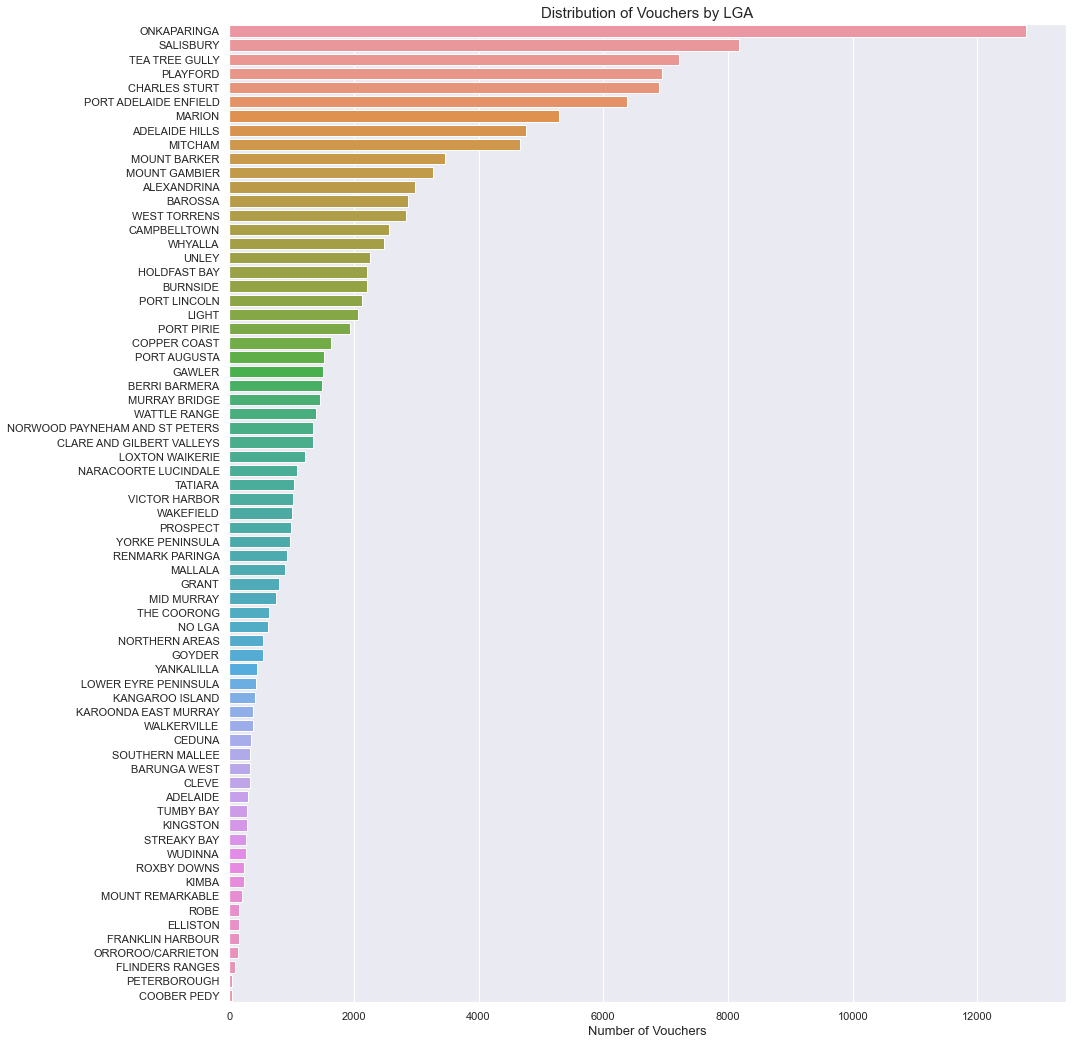

In [34]:
# show distribution of vouchers by LGA
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 18))
LGA_vouchers = LGA_vouchers.sort_values("Voucher_Count", ascending = False)
sns.barplot(data=LGA_vouchers, x="Voucher_Count", y="Participant_LGA")
plt.title("Distribution of Vouchers by LGA", fontsize=15)
plt.xlabel("Number of Vouchers", fontsize = 13)
plt.ylabel("");

In [35]:
LGA_vouchers["Voucher_prop"] = round(LGA_vouchers["Voucher_Count"] / sum(LGA_vouchers["Voucher_Count"]) * 100, 2)
LGA_vouchers = LGA_vouchers.sort_values(by="Voucher_prop", ascending = False)
print("Proportion of number of vouchers for top 15 LGAs:\t", LGA_vouchers["Voucher_prop"].nlargest(15).sum())
print("Total number of LGAs:\t", LGA_vouchers.shape[0])

Proportion of number of vouchers for top 15 LGAs:	 63.599999999999994
Total number of LGAs:	 69


__Findings of LGA analysis:__
The use of vouchers across LGAs is highly uneven. There are only a few LGAs that amount for the majority of vouchers used. Namely, the top 15 out of 69 LGAs account for 63.5% of vouchers redeemed.

## By Sports

In [36]:
# group by sports
sports_vouchers = sa_vouchers_scores.groupby(
    "Voucher_Sport")["Voucher_Sport"].count().to_frame(name = 'Voucher_Count').reset_index()
sports_vouchers = sports_vouchers.sort_values(by='Voucher_Count', ascending= False)
sports_vouchers.head(10)

Voucher_Sport  Voucher_Count
2    Australian Rules          47224
27            Netball          24017
15  Football (Soccer)          15775
17         Gymnastics           9823
6          Basketball           6016
1           Athletics           4518
44             Tennis           3742
18             Hockey           3026
8        Calisthenics           2522
9             Cricket           1875

In [37]:
# calculate proportion of vouchers per sport, then show where 80% of vouchers are redeemed
sports_vouchers["Voucher_prop"] = round(sports_vouchers["Voucher_Count"]/sum(sports_vouchers["Voucher_Count"])*100, 2)
sports_vouchers.head(10)
    

Voucher_Sport  Voucher_Count  Voucher_prop
2    Australian Rules          47224         37.03
27            Netball          24017         18.83
15  Football (Soccer)          15775         12.37
17         Gymnastics           9823          7.70
6          Basketball           6016          4.72
1           Athletics           4518          3.54
44             Tennis           3742          2.93
18             Hockey           3026          2.37
8        Calisthenics           2522          1.98
9             Cricket           1875          1.47

In [38]:
sports_vouchers["Voucher_prop"].head(10).sum(), sports_vouchers.shape

(92.94000000000001, (50, 3))

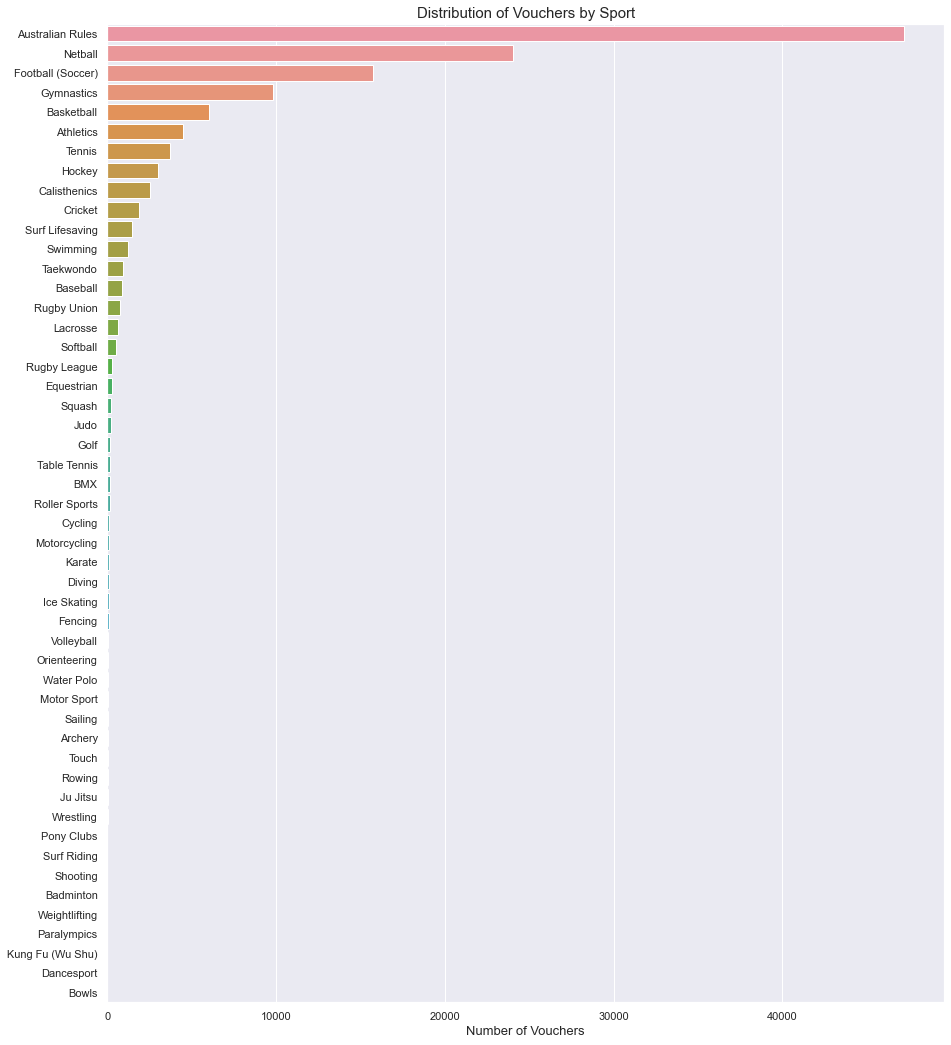

In [39]:
# show distribution of vouchers by sports
plt.figure(figsize=(15, 18))
sns.barplot(data=sports_vouchers, x="Voucher_Count", y="Voucher_Sport")
plt.title("Distribution of Vouchers by Sport", fontsize=15)
plt.xlabel("Number of Vouchers", fontsize = 13)
plt.ylabel("");

In [40]:
# show sports where less than 50 vouchers have been redeemed
sports_vouchers[sports_vouchers["Voucher_Count"] < 50]

Voucher_Sport  Voucher_Count  Voucher_prop
47        Water Polo             48          0.04
25       Motor Sport             45          0.04
35           Sailing             40          0.03
0            Archery             34          0.03
45             Touch             23          0.02
32            Rowing             22          0.02
20          Ju Jitsu             22          0.02
49         Wrestling             19          0.01
30        Pony Clubs             17          0.01
40       Surf Riding             15          0.01
36          Shooting              4          0.00
4          Badminton              4          0.00
48     Weightlifting              4          0.00
29       Paralympics              3          0.00
23  Kung Fu (Wu Shu)              2          0.00
11        Dancesport              2          0.00
7              Bowls              2          0.00

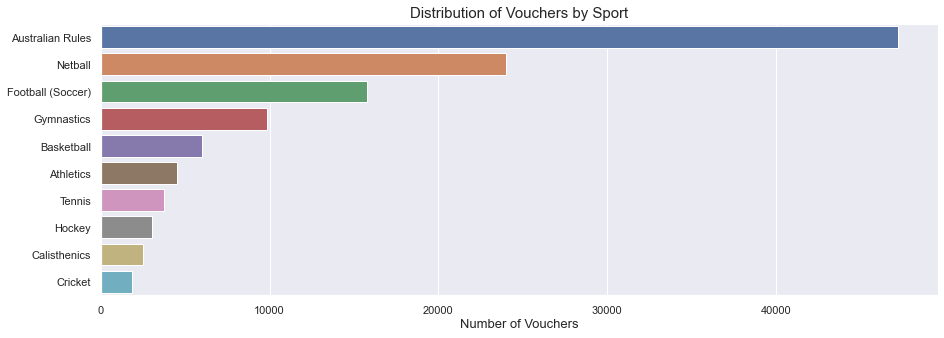

In [41]:
# show distribution of vouchers by more relevant sports
plt.figure(figsize=(15, 5))
sns.barplot(data=sports_vouchers.nlargest(10, "Voucher_Count"), x="Voucher_Count", y="Voucher_Sport")
plt.title("Distribution of Vouchers by Sport", fontsize=15)
plt.xlabel("Number of Vouchers", fontsize = 13)
plt.ylabel("");

__Findings of Sports analysis:__

It can clearly be seen that the distribution of voucher redemption by sports is highly uneven. There are 50 sports to choose from, however, 10 of these account for over 90% of vouchers.

# Are some sports more popular in different parts of the state?

In [42]:
# select 10 most popular sports and 15 most populated states
LGA_top15 = LGA_vouchers.nlargest(15, "Voucher_Count")
sports_top10 = sports_vouchers.nlargest(10, "Voucher_Count")
sports_top10

Voucher_Sport  Voucher_Count  Voucher_prop
2    Australian Rules          47224         37.03
27            Netball          24017         18.83
15  Football (Soccer)          15775         12.37
17         Gymnastics           9823          7.70
6          Basketball           6016          4.72
1           Athletics           4518          3.54
44             Tennis           3742          2.93
18             Hockey           3026          2.37
8        Calisthenics           2522          1.98
9             Cricket           1875          1.47

In [43]:
# create list with popular sport
sports_list = sports_top10["Voucher_Sport"].tolist()
sports_list

['Australian Rules',
 'Netball',
 'Football (Soccer)',
 'Gymnastics',
 'Basketball',
 'Athletics',
 'Tennis',
 'Hockey',
 'Calisthenics',
 'Cricket']

In [44]:
# group by participants LGA and sports
LGA_sports_vouchers = sa_vouchers_scores.groupby(
    ["Participant_LGA", "Voucher_Sport"])["Participant_LGA"].count().to_frame(name = 'Voucher_Count').reset_index()
LGA_sports_vouchers

Participant_LGA     Voucher_Sport  Voucher_Count
0            ADELAIDE         Athletics             16
1            ADELAIDE  Australian Rules            130
2            ADELAIDE          Baseball              1
3            ADELAIDE        Basketball              4
4            ADELAIDE      Calisthenics              1
...               ...               ...            ...
1152  YORKE PENINSULA      Motorcycling              2
1153  YORKE PENINSULA           Netball            313
1154  YORKE PENINSULA   Surf Lifesaving              4
1155  YORKE PENINSULA         Taekwondo             87
1156  YORKE PENINSULA            Tennis              9

[1157 rows x 3 columns]

In [45]:
# drop records that are not in list with most popular sport
LGA_sports_clean = LGA_sports_vouchers[LGA_sports_vouchers["Voucher_Sport"].isin(sports_list)]
LGA_sports_clean

Participant_LGA      Voucher_Sport  Voucher_Count
0            ADELAIDE          Athletics             16
1            ADELAIDE   Australian Rules            130
3            ADELAIDE         Basketball              4
4            ADELAIDE       Calisthenics              1
5            ADELAIDE            Cricket              2
...               ...                ...            ...
1147  YORKE PENINSULA  Football (Soccer)              7
1149  YORKE PENINSULA         Gymnastics              1
1150  YORKE PENINSULA             Hockey             99
1153  YORKE PENINSULA            Netball            313
1156  YORKE PENINSULA             Tennis              9

[555 rows x 3 columns]

In [46]:
# reshape grouped output
LGA_sports_piv = pd.pivot_table(LGA_sports_clean, index="Participant_LGA", columns="Voucher_Sport", values="Voucher_Count")
LGA_sports_piv

Voucher_Sport    Athletics  Australian Rules  Basketball  Calisthenics  \
Participant_LGA                                                          
ADELAIDE              16.0             130.0         4.0           1.0   
ADELAIDE HILLS       204.0            1412.0        48.0          62.0   
ALEXANDRINA           62.0             980.0       204.0           5.0   
BAROSSA              158.0            1196.0       341.0           9.0   
BARUNGA WEST           1.0              86.0        12.0           NaN   
...                    ...               ...         ...           ...   
WEST TORRENS         114.0             907.0        70.0          45.0   
WHYALLA               15.0             569.0       605.0          15.0   
WUDINNA               29.0              44.0         NaN           NaN   
YANKALILLA            10.0             214.0         1.0           NaN   
YORKE PENINSULA       30.0             309.0        87.0           NaN   

Voucher_Sport    Cricket  Football (Soccer)  Gymnastics  Hockey  Netball  \
Participant_LGA                                                            
ADELAIDE             2.0               27.0        20.0    17.0     23.0   
ADELAIDE HILLS     128.0              812.0       176.0    52.0   1395.0   
ALEXANDRINA          8.0              510.0        86.0    39.0    860.0   
BAROSSA             56.0              197.0       117.0   213.0    445.0   
BARUNGA WEST         1.0               11.0         4.0     2.0    193.0   
...                  ...                ...         ...     ...      ...   
WEST TORRENS        85.0              425.0       386.0    49.0    268.0   
WHYALLA             12.0              268.0       154.0   321.0    509.0   
WUDINNA              NaN                NaN         NaN     NaN    194.0   
YANKALILLA           NaN                5.0        10.0    16.0    174.0   
YORKE PENINSULA      9.0                7.0         1.0    99.0    313.0   

Voucher_Sport    Tennis  
Participant_LGA          
ADELAIDE            4.0  
ADELAIDE HILLS    257.0  
ALEXANDRINA       109.0  
BAROSSA            83.0  
BARUNGA WEST        3.0  
...                 ...  
WEST TORRENS      158.0  
WHYALLA             NaN  
WUDINNA             NaN  
YANKALILLA          2.0  
YORKE PENINSULA     9.0  

[69 rows x 10 columns]

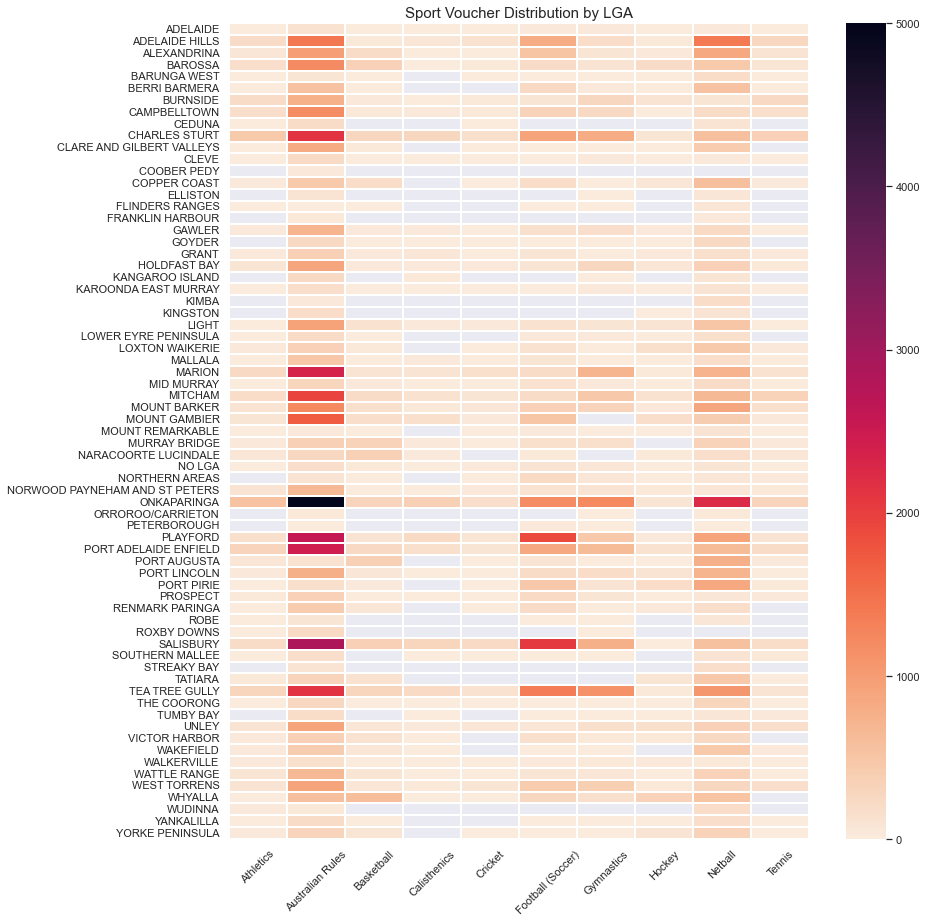

In [47]:
plt.figure(figsize=(13, 15))
sns.heatmap(LGA_sports_piv, vmin=0, vmax=5000, cmap=sns.cm.rocket_r, linewidths=0.1)
plt.title("Sport Voucher Distribution by LGA", fontsize = 15)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45);

There a few things to note about this heatmap:
1. Since all LGAs are included, there are a lot of empty values. Thus, it can be seen in which areas more or less vouchers are redeemed. In the following, another heatmap will be shown to get a more granular view between states that have higher voucher redemption. Actually, as it has been shown, this is due to population size and the hypothesis whether there is a difference between rural and metropolitan areas will be tested later with plotting a map.
2. The popluarity of sports is visualised on the map. The more popular a sport is, the less missing values it has across LGAs. It can be seen that vouchers for Australian Rules are redeemed in every single area, while Netball vouchers are redeemed in almost every area. This underlines their popularity throughout the state.

In [48]:
# create list with 15 most populated areas
LGA_list = LGA_top15["Participant_LGA"].tolist()
LGA_list

['ONKAPARINGA',
 'SALISBURY',
 'TEA TREE GULLY',
 'PLAYFORD',
 'CHARLES STURT',
 'PORT ADELAIDE ENFIELD',
 'MARION',
 'ADELAIDE HILLS',
 'MITCHAM',
 'MOUNT BARKER',
 'MOUNT GAMBIER',
 'ALEXANDRINA',
 'BAROSSA',
 'WEST TORRENS',
 'CAMPBELLTOWN']

In [49]:
# drop records from grouped df that are not in list with most populated areas
LGA_sports_clean2 = LGA_sports_clean[LGA_sports_clean["Participant_LGA"].isin(LGA_list)]
LGA_sports_clean2

Participant_LGA      Voucher_Sport  Voucher_Count
22    ADELAIDE HILLS          Athletics            204
23    ADELAIDE HILLS   Australian Rules           1412
26    ADELAIDE HILLS         Basketball             48
27    ADELAIDE HILLS       Calisthenics             62
28    ADELAIDE HILLS            Cricket            128
...              ...                ...            ...
1092    WEST TORRENS  Football (Soccer)            425
1094    WEST TORRENS         Gymnastics            386
1095    WEST TORRENS             Hockey             49
1098    WEST TORRENS            Netball            268
1108    WEST TORRENS             Tennis            158

[149 rows x 3 columns]

In [50]:
# reshape grouped output
LGA_sports_piv2 = pd.pivot_table(LGA_sports_clean2, 
                                 index="Voucher_Sport", 
                                 columns="Participant_LGA", 
                                 values="Voucher_Count")
LGA_sports_piv2

Participant_LGA    ADELAIDE HILLS  ALEXANDRINA  BAROSSA  CAMPBELLTOWN  \
Voucher_Sport                                                           
Athletics                   204.0         62.0    158.0         162.0   
Australian Rules           1412.0        980.0   1196.0        1186.0   
Basketball                   48.0        204.0    341.0          40.0   
Calisthenics                 62.0          5.0      9.0          26.0   
Cricket                     128.0          8.0     56.0          47.0   
Football (Soccer)           812.0        510.0    197.0         319.0   
Gymnastics                  176.0         86.0    117.0         248.0   
Hockey                       52.0         39.0    213.0          17.0   
Netball                    1395.0        860.0    445.0         205.0   
Tennis                      257.0        109.0     83.0         154.0   

Participant_LGA    CHARLES STURT  MARION  MITCHAM  MOUNT BARKER  \
Voucher_Sport                                                     
Athletics                  447.0   238.0    176.0         107.0   
Australian Rules          2147.0  2362.0   1939.0        1230.0   
Basketball                 256.0   101.0    210.0         147.0   
Calisthenics               266.0   104.0    125.0          47.0   
Cricket                    137.0   155.0     89.0          65.0   
Football (Soccer)          917.0   203.0    198.0         333.0   
Gymnastics                 807.0   719.0    457.0         294.0   
Hockey                      87.0    57.0    123.0          36.0   
Netball                    584.0   723.0    658.0         880.0   
Tennis                     336.0   126.0    313.0         147.0   

Participant_LGA    MOUNT GAMBIER  ONKAPARINGA  PLAYFORD  \
Voucher_Sport                                             
Athletics                   86.0        541.0     147.0   
Australian Rules          1710.0       5258.0    2580.0   
Basketball                 168.0        296.0     111.0   
Calisthenics               155.0        353.0     216.0   
Cricket                     22.0        168.0      91.0   
Football (Soccer)          502.0       1204.0    1880.0   
Gymnastics                   NaN       1211.0     451.0   
Hockey                     164.0         82.0      34.0   
Netball                    393.0       2242.0     904.0   
Tennis                      27.0        297.0     101.0   

Participant_LGA    PORT ADELAIDE ENFIELD  SALISBURY  TEA TREE GULLY  \
Voucher_Sport                                                         
Athletics                          298.0      214.0           280.0   
Australian Rules                  2453.0     2856.0          2131.0   
Basketball                         243.0      362.0           284.0   
Calisthenics                       150.0      282.0           231.0   
Cricket                             90.0      220.0           118.0   
Football (Soccer)                  853.0     2069.0          1356.0   
Gymnastics                         627.0      763.0          1114.0   
Hockey                             124.0       17.0            42.0   
Netball                            630.0      566.0          1068.0   
Tennis                             197.0      192.0           115.0   

Participant_LGA    WEST TORRENS  
Voucher_Sport                    
Athletics                 114.0  
Australian Rules          907.0  
Basketball                 70.0  
Calisthenics               45.0  
Cricket                    85.0  
Football (Soccer)         425.0  
Gymnastics                386.0  
Hockey                     49.0  
Netball                   268.0  
Tennis                    158.0

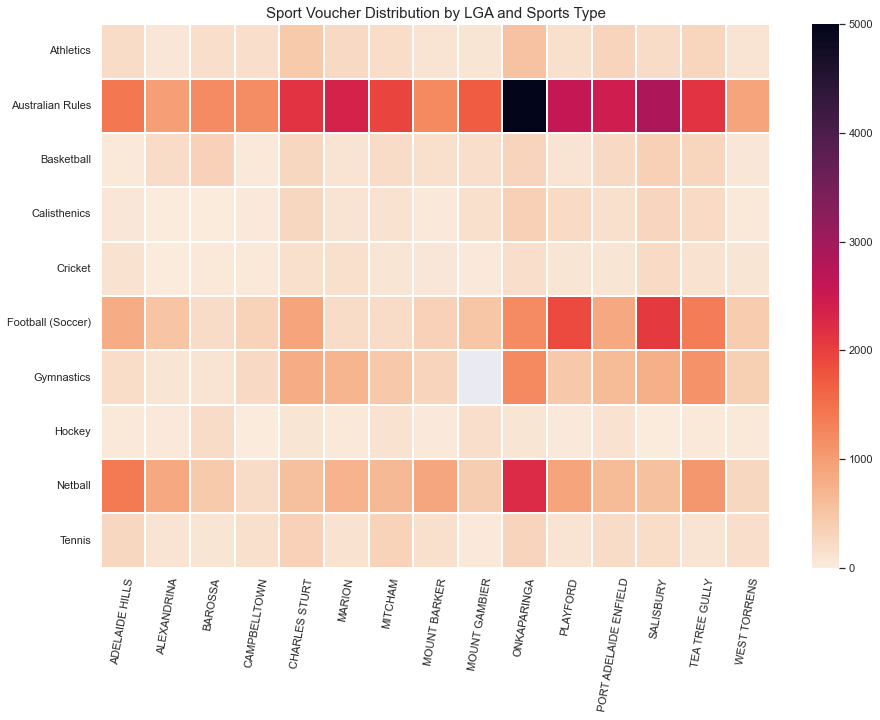

In [51]:
# create heatmap with most populated areas
plt.figure(figsize=(15, 10))
sns.heatmap(LGA_sports_piv2, 
            vmin=0, 
            vmax=5000, 
            cmap=sns.cm.rocket_r, 
            linewidth=0.1)
plt.title("Sport Voucher Distribution by LGA and Sports Type", fontsize = 15)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=80);

__Findings:__
It can clearly be seen that Australian Rules is by far the most popular sport across all states. Even in the top 15 LGAs, this sport still stands out. It is also clear that it is especially popular in Onkaparinga.

## Plot Voucher distribution on Map

In [52]:
map_df.head()

lgatype   abbname                    lga  shape_Length  shape_Area  \
0      CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
1      CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
2      CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
3      CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   
4      CC  ADELAIDE  ADELAIDE CITY COUNCIL      0.154856    0.001506   

                                            geometry  Participant_ID  \
0  MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000830.0   
1  MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000831.0   
2  MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000833.0   
3  MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000833.0   
4  MULTIPOLYGON (((138.61916 -34.92526, 138.62178...       1000834.0   

  Participant_Suburb       Club_Previous_Member Participant_ATSI_Indicator  \
0           ADELAIDE  Not Registered Previously                   Not ATSI   
1           ADELAIDE      Registered Previously                   Not ATSI   
2           ADELAIDE      Registered Previously                   Not ATSI   
3           ADELAIDE      Registered Previously                   Not ATSI   
4           ADELAIDE  Not Registered Previously                   Not ATSI   

   ...      Voucher_Sport Participant_LGA  Participant_Electorate  \
0  ...  Football (Soccer)        ADELAIDE                ADELAIDE   
1  ...          Athletics        ADELAIDE                ADELAIDE   
2  ...   Australian Rules        ADELAIDE                ADELAIDE   
3  ...   Australian Rules        ADELAIDE                ADELAIDE   
4  ...          Athletics        ADELAIDE                ADELAIDE   

  Voucher_Completion_Date Voucher_Claim_Year    IEO    IER   IRSAD    IRSD  \
0            29/5/15 0:01             2015.0  874.0  874.0  1036.0  1013.0   
1           29/12/15 3:31             2015.0  874.0  874.0  1036.0  1013.0   
2             7/6/16 3:12             2016.0  874.0  874.0  1036.0  1013.0   
3            9/11/15 2:24             2015.0  874.0  874.0  1036.0  1013.0   
4           29/11/16 6:50             2016.0  874.0  874.0  1036.0  1013.0   

   Population  
0     19606.0  
1     19606.0  
2     19606.0  
3     19606.0  
4     19606.0  

[5 rows x 24 columns]

In [53]:
# join relevant columns with count aggregate
voucher_count = sa_vouchers_scores.groupby(
    "Participant_LGA")["Participant_LGA"].count().to_frame(name = 'Voucher_Count').reset_index()
plot_count = map_df[['abbname', 'geometry']]
plot = pd.merge(plot_count, voucher_count, how='left', left_on = 'abbname', right_on = 'Participant_LGA')
plot = plot.drop("Participant_LGA", axis=1)
plot

abbname                                           geometry  \
0       ADELAIDE  MULTIPOLYGON (((138.61916 -34.92526, 138.62178...   
1       ADELAIDE  MULTIPOLYGON (((138.61916 -34.92526, 138.62178...   
2       ADELAIDE  MULTIPOLYGON (((138.61916 -34.92526, 138.62178...   
3       ADELAIDE  MULTIPOLYGON (((138.61916 -34.92526, 138.62178...   
4       ADELAIDE  MULTIPOLYGON (((138.61916 -34.92526, 138.62178...   
...          ...                                                ...   
126903       NaN                                               None   
126904       NaN                                               None   
126905       NaN                                               None   
126906       NaN                                               None   
126907       NaN                                               None   

        Voucher_Count  
0               302.0  
1               302.0  
2               302.0  
3               302.0  
4               302.0  
...               ...  
126903            NaN  
126904            NaN  
126905            NaN  
126906            NaN  
126907            NaN  

[126908 rows x 3 columns]

In [54]:
# keep distinct records and drop LGA without vouchers
plot_distinct = plot.drop_duplicates()
plot_distinct = plot_distinct.dropna()
plot_distinct

abbname  \
0                    ADELAIDE   
302                  BURNSIDE   
2515            MOUNT GAMBIER   
5786    PORT ADELAIDE ENFIELD   
12170            PORT AUGUSTA   
...                       ...   
113237            ROXBY DOWNS   
113471         TEA TREE GULLY   
120690           WEST TORRENS   
123534          MURRAY BRIDGE   
124996              WAKEFIELD   

                                                 geometry  Voucher_Count  
0       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...          302.0  
302     MULTIPOLYGON (((138.69662 -34.92009, 138.69746...         2213.0  
2515    MULTIPOLYGON (((140.78651 -37.80198, 140.78662...         3271.0  
5786    MULTIPOLYGON (((138.51045 -34.79261, 138.50967...         6384.0  
12170   MULTIPOLYGON (((137.75403 -32.37753, 137.75448...         1522.0  
...                                                   ...            ...  
113237  MULTIPOLYGON (((136.89787 -30.48077, 136.89787...          234.0  
113471  MULTIPOLYGON (((138.77559 -34.73521, 138.77396...         7219.0  
120690  MULTIPOLYGON (((138.57680 -34.90910, 138.57685...         2844.0  
123534  MULTIPOLYGON (((139.01938 -34.95261, 139.02040...         1462.0  
124996  MULTIPOLYGON (((138.49757 -33.62578, 138.50297...         1010.0  

[67 rows x 3 columns]

In [55]:
plot_distinct[(plot_distinct['abbname']=='ROXBY DOWNS') | (plot_distinct['abbname']=='COOBER PEDY')]

abbname                                           geometry  \
54332   COOBER PEDY  MULTIPOLYGON (((134.80915 -29.05169, 134.80757...   
113237  ROXBY DOWNS  MULTIPOLYGON (((136.89787 -30.48077, 136.89787...   

        Voucher_Count  
54332            39.0  
113237          234.0

In [56]:
plot_distinct1 = plot_distinct.drop((
    plot_distinct[plot_distinct['abbname']=='ROXBY DOWNS'].index) | 
    (plot_distinct[plot_distinct['abbname']=='COOBER PEDY'].index))
plot_distinct1

/var/folders/31/2xxsfpps75923jkzs3xks1w00000gq/T/ipykernel_74695/4236694386.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  plot_distinct1 = plot_distinct.drop((


abbname  \
0                    ADELAIDE   
302                  BURNSIDE   
2515            MOUNT GAMBIER   
5786    PORT ADELAIDE ENFIELD   
12170            PORT AUGUSTA   
...                       ...   
111302             PORT PIRIE   
113471         TEA TREE GULLY   
120690           WEST TORRENS   
123534          MURRAY BRIDGE   
124996              WAKEFIELD   

                                                 geometry  Voucher_Count  
0       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...          302.0  
302     MULTIPOLYGON (((138.69662 -34.92009, 138.69746...         2213.0  
2515    MULTIPOLYGON (((140.78651 -37.80198, 140.78662...         3271.0  
5786    MULTIPOLYGON (((138.51045 -34.79261, 138.50967...         6384.0  
12170   MULTIPOLYGON (((137.75403 -32.37753, 137.75448...         1522.0  
...                                                   ...            ...  
111302  MULTIPOLYGON (((138.16422 -33.10628, 138.16488...         1935.0  
113471  MULTIPOLYGON (((138.77559 -34.73521, 138.77396...         7219.0  
120690  MULTIPOLYGON (((138.57680 -34.90910, 138.57685...         2844.0  
123534  MULTIPOLYGON (((139.01938 -34.95261, 139.02040...         1462.0  
124996  MULTIPOLYGON (((138.49757 -33.62578, 138.50297...         1010.0  

[65 rows x 3 columns]

Note: the three LGAs with 0 vouchers have been removed since they distort the visualisation of the map. These are all in the north of the state and do not add information, but rather occupy half of the map which leads to relevant states being too small and not distinguishable. Roxby Downs and Coober Pedy are removed too because they are in between the other three that do not add information. Even though there are vouchers redeemed, the number is insignificantly small.

In [57]:
top5 = plot_distinct1.sort_values("Voucher_Count", ascending=False).nlargest(5, "Voucher_Count")
top5

abbname                                           geometry  \
91580      ONKAPARINGA  MULTIPOLYGON (((138.56395 -35.02975, 138.56397...   
24033        SALISBURY  MULTIPOLYGON (((138.65927 -34.72560, 138.65598...   
113471  TEA TREE GULLY  MULTIPOLYGON (((138.77559 -34.73521, 138.77396...   
104362        PLAYFORD  MULTIPOLYGON (((138.67086 -34.61590, 138.67110...   
74426    CHARLES STURT  MULTIPOLYGON (((138.47942 -34.85039, 138.48376...   

        Voucher_Count  
91580         12782.0  
24033          8169.0  
113471         7219.0  
104362         6940.0  
74426          6897.0

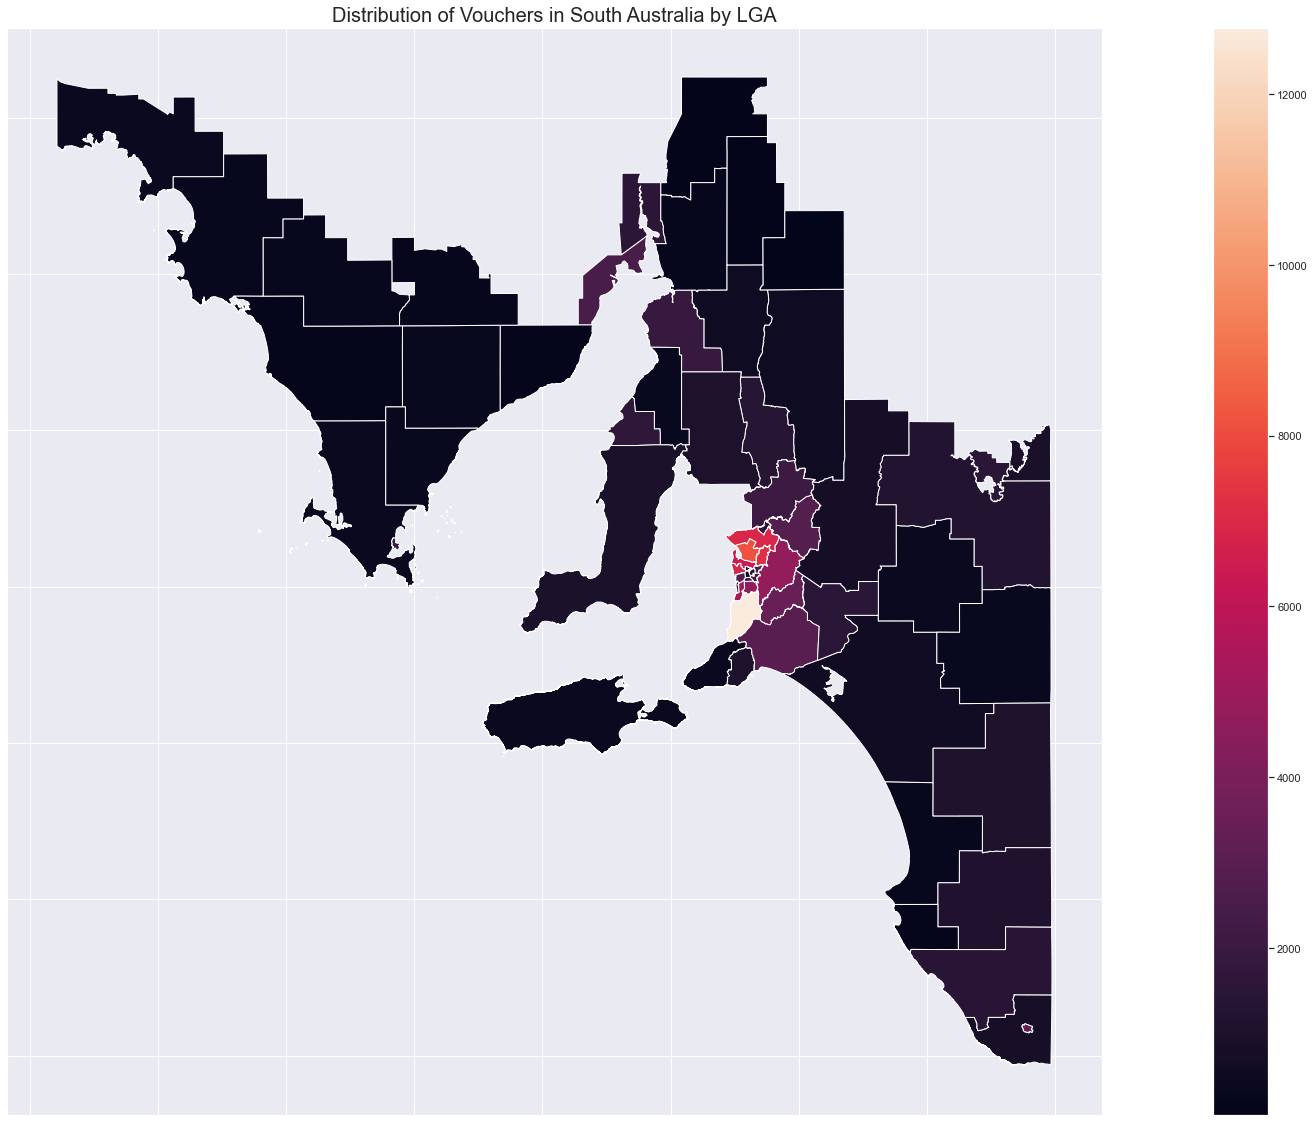

In [58]:
# plot voucher count on map
plt.rcParams["figure.figsize"] = (40, 20)
plot_distinct1.plot(column='Voucher_Count', legend=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.title("Distribution of Vouchers in South Australia by LGA", fontsize=20);

As expected, the LGAs with most number of vouchers are found in the metropolitan area around Adelaide.

# Are any LGAs over/under represented in their use of vouchers?

In [59]:
# extract LGAs and respective population from main dataframe
population = sa_vouchers_scores.drop_duplicates("Participant_LGA")[["Participant_LGA", "Population"]]
population.sort_values(by='Participant_LGA')

Participant_LGA  Population
829           ADELAIDE       19606
1275    ADELAIDE HILLS       38601
4122       ALEXANDRINA       23693
3093           BAROSSA       22174
2839      BARUNGA WEST        2467
...                ...         ...
5287      WEST TORRENS       54932
71759          WHYALLA       22070
51891          WUDINNA        1256
6436        YANKALILLA        4406
1018   YORKE PENINSULA       11046

[69 rows x 2 columns]

In [60]:
# check for missing values 
population[population["Population"].isnull()]

Empty DataFrame
Columns: [Participant_LGA, Population]
Index: []

Missing values will be read in from the 2016 census data manually. In the original government data, there is a record for 'unincorporated' LGA which is explained as communities that do not belong to any LGA. Thus, it is assumed that 'NO LGA' reflects this category since 'unincorporated' cannot be found in the dataframe.

In [61]:
dict_update = {'NO LGA': 3583, 
               'LIGHT': 15041, 
               'ADELAIDE PLAINS': 8912, 
               'BERRI BARMERA': 10838, 
               'NARACOORTE LUCINDALE': 8544, 
               'PORT PIRIE': 17767,
               'NORWOOD PAYNEHAM AND ST PETERS': 36396}

dict_update['NO LGA']

3583

In [62]:
# for loop to fill missing values in

NANs = population[population["Population"].isnull()]['Participant_LGA']

for i, value in enumerate(NANs):
    myList = list(NANs.index) # create a list of indexes of the missing values
    print(myList)
    population['Population'][myList[i]] = dict_update[value] 
    
population[population["Population"].isnull()]

Empty DataFrame
Columns: [Participant_LGA, Population]
Index: []

In [63]:
# Concatenate to single dataframe
LGA_vouchers = LGA_vouchers.sort_values(by='Participant_LGA')
pop_lga = pd.merge(population, LGA_vouchers, 'outer', 'Participant_LGA')
pop_lga

Participant_LGA  Population  Voucher_Count  Voucher_prop
0             ONKAPARINGA      159517          12782         10.02
1                ADELAIDE       19606            302          0.24
2         YORKE PENINSULA       11046            977          0.77
3           CHARLES STURT      104922           6897          5.41
4   PORT ADELAIDE ENFIELD      112797           6384          5.01
..                    ...         ...            ...           ...
64          MOUNT GAMBIER       25254           3271          2.56
65                WHYALLA       22070           2488          1.95
66           PETERBOROUGH        1733             45          0.04
67           PORT LINCOLN       14083           2125          1.67
68            ROXBY DOWNS        4694            234          0.18

[69 rows x 4 columns]

In [64]:
# show correlation between population and number of vouchers
pop_lga.corr()

Population  Voucher_Count  Voucher_prop
Population       1.000000       0.960068      0.960152
Voucher_Count    0.960068       1.000000      0.999999
Voucher_prop     0.960152       0.999999      1.000000

Since there is a high correlation, this indicates that the number of vouchers per area should be considered relatively to population size for comparison. <br >
__Note:__ This has been already inferred from the map since metropolitan areas had a higher number of vouchers than rural areas, indicating that this is due to the larger number of people living in that area.

In [65]:
# create column of number of vouchers per hundred people in each LGA
pop_lga["Voucher_Per_100"] = round(
    (pop_lga["Voucher_Count"] / pop_lga["Population"]) * 100, 2)
pop_lga = pop_lga.sort_values("Voucher_Per_100", ascending = False)
pop_lga

Participant_LGA  Population  Voucher_Count  Voucher_prop  \
27            KAROONDA EAST MURRAY        1035            388          0.30   
46                           KIMBA        1087            232          0.18   
63                         WUDINNA        1256            267          0.21   
18                           CLEVE        1729            329          0.26   
60                 SOUTHERN MALLEE        2097            342          0.27   
..                             ...         ...            ...           ...   
55                        PROSPECT       19950            986          0.77   
54  NORWOOD PAYNEHAM AND ST PETERS       34863           1352          1.06   
66                    PETERBOROUGH        1733             45          0.04   
56                     COOBER PEDY        1694             39          0.03   
1                         ADELAIDE       19606            302          0.24   

    Voucher_Per_100  
27            37.49  
46            21.34  
63            21.26  
18            19.03  
60            16.31  
..              ...  
55             4.94  
54             3.88  
66             2.60  
56             2.30  
1              1.54  

[69 rows x 5 columns]

In [66]:
# check mean of column
mean = pop_lga['Voucher_Per_100'].mean()
mean

10.741739130434777

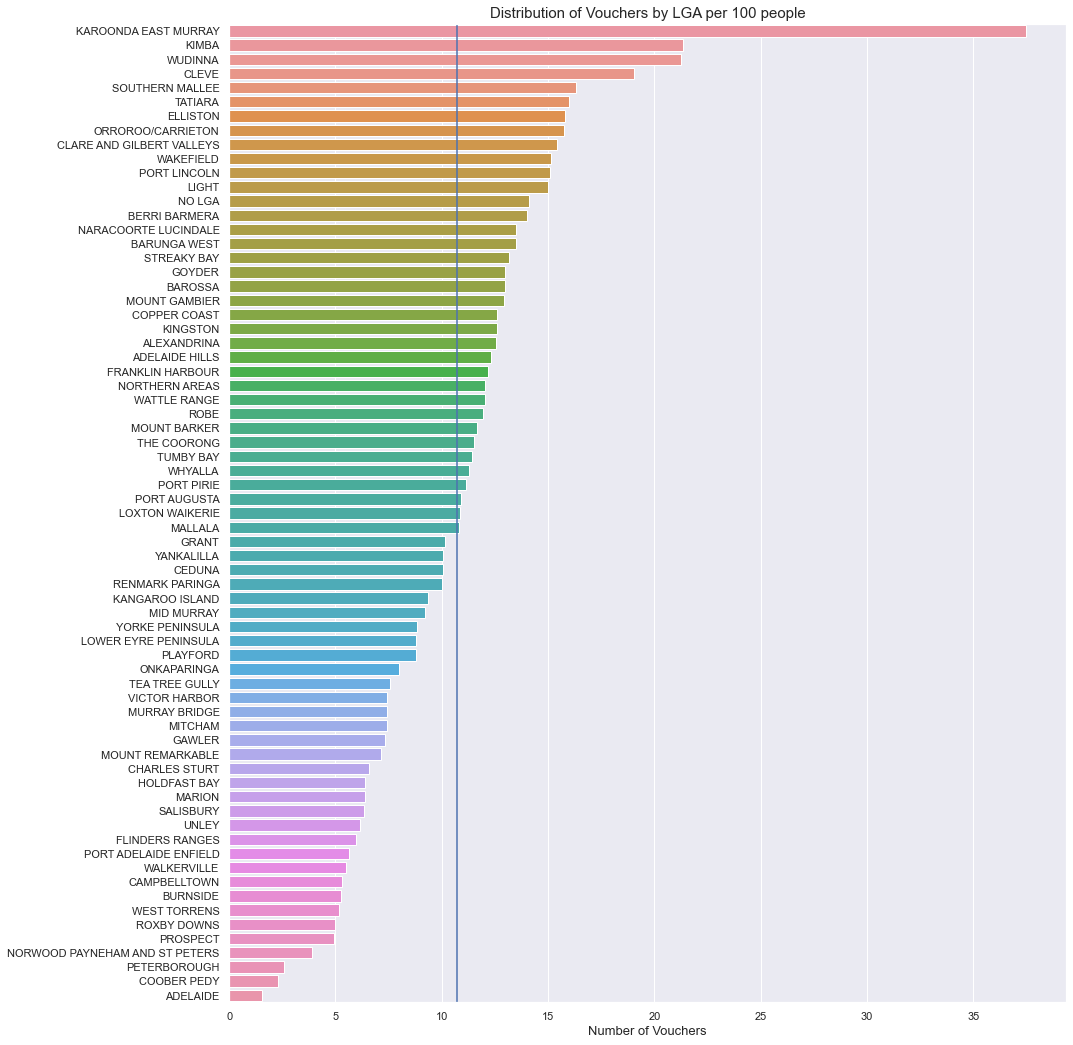

In [67]:
# plot a barplot with mean line to show deviation of LGAs
plt.figure(figsize=(15, 18))
sns.barplot(data=pop_lga, x="Voucher_Per_100", y="Participant_LGA")
plt.title("Distribution of Vouchers by LGA per 100 people", fontsize=15)
plt.xlabel("Number of Vouchers", fontsize = 13)
plt.ylabel("")
plt.axvline(mean);

In [68]:
# show all overrepresented LGAs
pop_lga[pop_lga['Voucher_Per_100'] > mean]

Participant_LGA  Population  Voucher_Count  Voucher_prop  \
27       KAROONDA EAST MURRAY        1035            388          0.30   
46                      KIMBA        1087            232          0.18   
63                    WUDINNA        1256            267          0.21   
18                      CLEVE        1729            329          0.26   
60            SOUTHERN MALLEE        2097            342          0.27   
29                    TATIARA        6559           1048          0.82   
58                   ELLISTON        1045            165          0.13   
50          ORROROO/CARRIETON         871            137          0.11   
10  CLARE AND GILBERT VALLEYS        8750           1349          1.06   
25                  WAKEFIELD        6663           1010          0.79   
67               PORT LINCOLN       14083           2125          1.67   
9                       LIGHT       13785           2066          1.62   
6                      NO LGA        4433            625          0.49   
32              BERRI BARMERA       10590           1486          1.17   
36       NARACOORTE LUCINDALE        8118           1097          0.86   
7                BARUNGA WEST        2467            333          0.26   
52                STREAKY BAY        2110            278          0.22   
17                     GOYDER        4178            542          0.43   
11                    BAROSSA       22174           2874          2.25   
64              MOUNT GAMBIER       25254           3271          2.56   
43               COPPER COAST       12929           1629          1.28   
23                   KINGSTON        2290            288          0.23   
15                ALEXANDRINA       23693           2979          2.34   
5              ADELAIDE HILLS       38601           4756          3.73   
57           FRANKLIN HARBOUR        1271            155          0.12   
14             NORTHERN AREAS        4497            542          0.43   
34               WATTLE RANGE       11632           1398          1.10   
40                       ROBE        1399            167          0.13   
38               MOUNT BARKER       29806           3469          2.72   
53                THE COORONG        5520            637          0.50   
48                  TUMBY BAY        2573            294          0.23   
65                    WHYALLA       22070           2488          1.95   
47                 PORT PIRIE       17360           1935          1.52   
39               PORT AUGUSTA       13978           1522          1.19   
42            LOXTON WAIKERIE       11266           1222          0.96   
31                    MALLALA        8333            899          0.70   

    Voucher_Per_100  
27            37.49  
46            21.34  
63            21.26  
18            19.03  
60            16.31  
29            15.98  
58            15.79  
50            15.73  
10            15.42  
25            15.16  
67            15.09  
9             14.99  
6             14.10  
32            14.03  
36            13.51  
7             13.50  
52            13.18  
17            12.97  
11            12.96  
64            12.95  
43            12.60  
23            12.58  
15            12.57  
5             12.32  
57            12.20  
14            12.05  
34            12.02  
40            11.94  
38            11.64  
53            11.54  
48            11.43  
65            11.27  
47            11.15  
39            10.89  
42            10.85  
31            10.79

In [69]:
# show all underrepresented LGAs
pop_lga[pop_lga['Voucher_Per_100'] < mean]

Participant_LGA  Population  Voucher_Count  Voucher_prop  \
8                            GRANT        7840            795          0.62   
28                      YANKALILLA        4406            443          0.35   
49                          CEDUNA        3485            350          0.27   
51                 RENMARK PARINGA        9231            925          0.73   
12                 KANGAROO ISLAND        4415            413          0.32   
16                      MID MURRAY        8134            751          0.59   
2                  YORKE PENINSULA       11046            977          0.77   
44            LOWER EYRE PENINSULA        4916            433          0.34   
13                        PLAYFORD       79082           6940          5.44   
0                      ONKAPARINGA      159517          12782         10.02   
30                  TEA TREE GULLY       95461           7219          5.66   
26                   VICTOR HARBOR       13843           1028          0.81   
24                   MURRAY BRIDGE       19742           1462          1.15   
35                         MITCHAM       62912           4662          3.66   
59                          GAWLER       20546           1505          1.18   
33                MOUNT REMARKABLE        2868            205          0.16   
3                    CHARLES STURT      104922           6897          5.41   
45                    HOLDFAST BAY       34646           2215          1.74   
19                          MARION       83005           5291          4.15   
41                       SALISBURY      129067           8169          6.41   
37                           UNLEY       36813           2266          1.78   
62                 FLINDERS RANGES        1703            102          0.08   
4            PORT ADELAIDE ENFIELD      112797           6384          5.01   
61                     WALKERVILLE        7008            386          0.30   
21                    CAMPBELLTOWN       48182           2567          2.01   
22                        BURNSIDE       42168           2213          1.74   
20                    WEST TORRENS       54932           2844          2.23   
68                     ROXBY DOWNS        4694            234          0.18   
55                        PROSPECT       19950            986          0.77   
54  NORWOOD PAYNEHAM AND ST PETERS       34863           1352          1.06   
66                    PETERBOROUGH        1733             45          0.04   
56                     COOBER PEDY        1694             39          0.03   
1                         ADELAIDE       19606            302          0.24   

    Voucher_Per_100  
8             10.14  
28            10.05  
49            10.04  
51            10.02  
12             9.35  
16             9.23  
2              8.84  
44             8.81  
13             8.78  
0              8.01  
30             7.56  
26             7.43  
24             7.41  
35             7.41  
59             7.33  
33             7.15  
3              6.57  
45             6.39  
19             6.37  
41             6.33  
37             6.16  
62             5.99  
4              5.66  
61             5.51  
21             5.33  
22             5.25  
20             5.18  
68             4.99  
55             4.94  
54             3.88  
66             2.60  
56             2.30  
1              1.54

In [70]:
plot_distinct

abbname  \
0                    ADELAIDE   
302                  BURNSIDE   
2515            MOUNT GAMBIER   
5786    PORT ADELAIDE ENFIELD   
12170            PORT AUGUSTA   
...                       ...   
113237            ROXBY DOWNS   
113471         TEA TREE GULLY   
120690           WEST TORRENS   
123534          MURRAY BRIDGE   
124996              WAKEFIELD   

                                                 geometry  Voucher_Count  
0       MULTIPOLYGON (((138.61916 -34.92526, 138.62178...          302.0  
302     MULTIPOLYGON (((138.69662 -34.92009, 138.69746...         2213.0  
2515    MULTIPOLYGON (((140.78651 -37.80198, 140.78662...         3271.0  
5786    MULTIPOLYGON (((138.51045 -34.79261, 138.50967...         6384.0  
12170   MULTIPOLYGON (((137.75403 -32.37753, 137.75448...         1522.0  
...                                                   ...            ...  
113237  MULTIPOLYGON (((136.89787 -30.48077, 136.89787...          234.0  
113471  MULTIPOLYGON (((138.77559 -34.73521, 138.77396...         7219.0  
120690  MULTIPOLYGON (((138.57680 -34.90910, 138.57685...         2844.0  
123534  MULTIPOLYGON (((139.01938 -34.95261, 139.02040...         1462.0  
124996  MULTIPOLYGON (((138.49757 -33.62578, 138.50297...         1010.0  

[67 rows x 3 columns]

In [71]:
# merge with geodata 
plot_proportion = pd.merge(plot_distinct1, pop_lga, how='inner', left_on='abbname', right_on='Participant_LGA')
plot_proportion

abbname                                           geometry  \
0                ADELAIDE  MULTIPOLYGON (((138.61916 -34.92526, 138.62178...   
1                BURNSIDE  MULTIPOLYGON (((138.69662 -34.92009, 138.69746...   
2           MOUNT GAMBIER  MULTIPOLYGON (((140.78651 -37.80198, 140.78662...   
3   PORT ADELAIDE ENFIELD  MULTIPOLYGON (((138.51045 -34.79261, 138.50967...   
4            PORT AUGUSTA  MULTIPOLYGON (((137.75403 -32.37753, 137.75448...   
..                    ...                                                ...   
60             PORT PIRIE  MULTIPOLYGON (((138.16422 -33.10628, 138.16488...   
61         TEA TREE GULLY  MULTIPOLYGON (((138.77559 -34.73521, 138.77396...   
62           WEST TORRENS  MULTIPOLYGON (((138.57680 -34.90910, 138.57685...   
63          MURRAY BRIDGE  MULTIPOLYGON (((139.01938 -34.95261, 139.02040...   
64              WAKEFIELD  MULTIPOLYGON (((138.49757 -33.62578, 138.50297...   

    Voucher_Count_x        Participant_LGA  Population  Voucher_Count_y  \
0             302.0               ADELAIDE       19606              302   
1            2213.0               BURNSIDE       42168             2213   
2            3271.0          MOUNT GAMBIER       25254             3271   
3            6384.0  PORT ADELAIDE ENFIELD      112797             6384   
4            1522.0           PORT AUGUSTA       13978             1522   
..              ...                    ...         ...              ...   
60           1935.0             PORT PIRIE       17360             1935   
61           7219.0         TEA TREE GULLY       95461             7219   
62           2844.0           WEST TORRENS       54932             2844   
63           1462.0          MURRAY BRIDGE       19742             1462   
64           1010.0              WAKEFIELD        6663             1010   

    Voucher_prop  Voucher_Per_100  
0           0.24             1.54  
1           1.74             5.25  
2           2.56            12.95  
3           5.01             5.66  
4           1.19            10.89  
..           ...              ...  
60          1.52            11.15  
61          5.66             7.56  
62          2.23             5.18  
63          1.15             7.41  
64          0.79            15.16  

[65 rows x 8 columns]

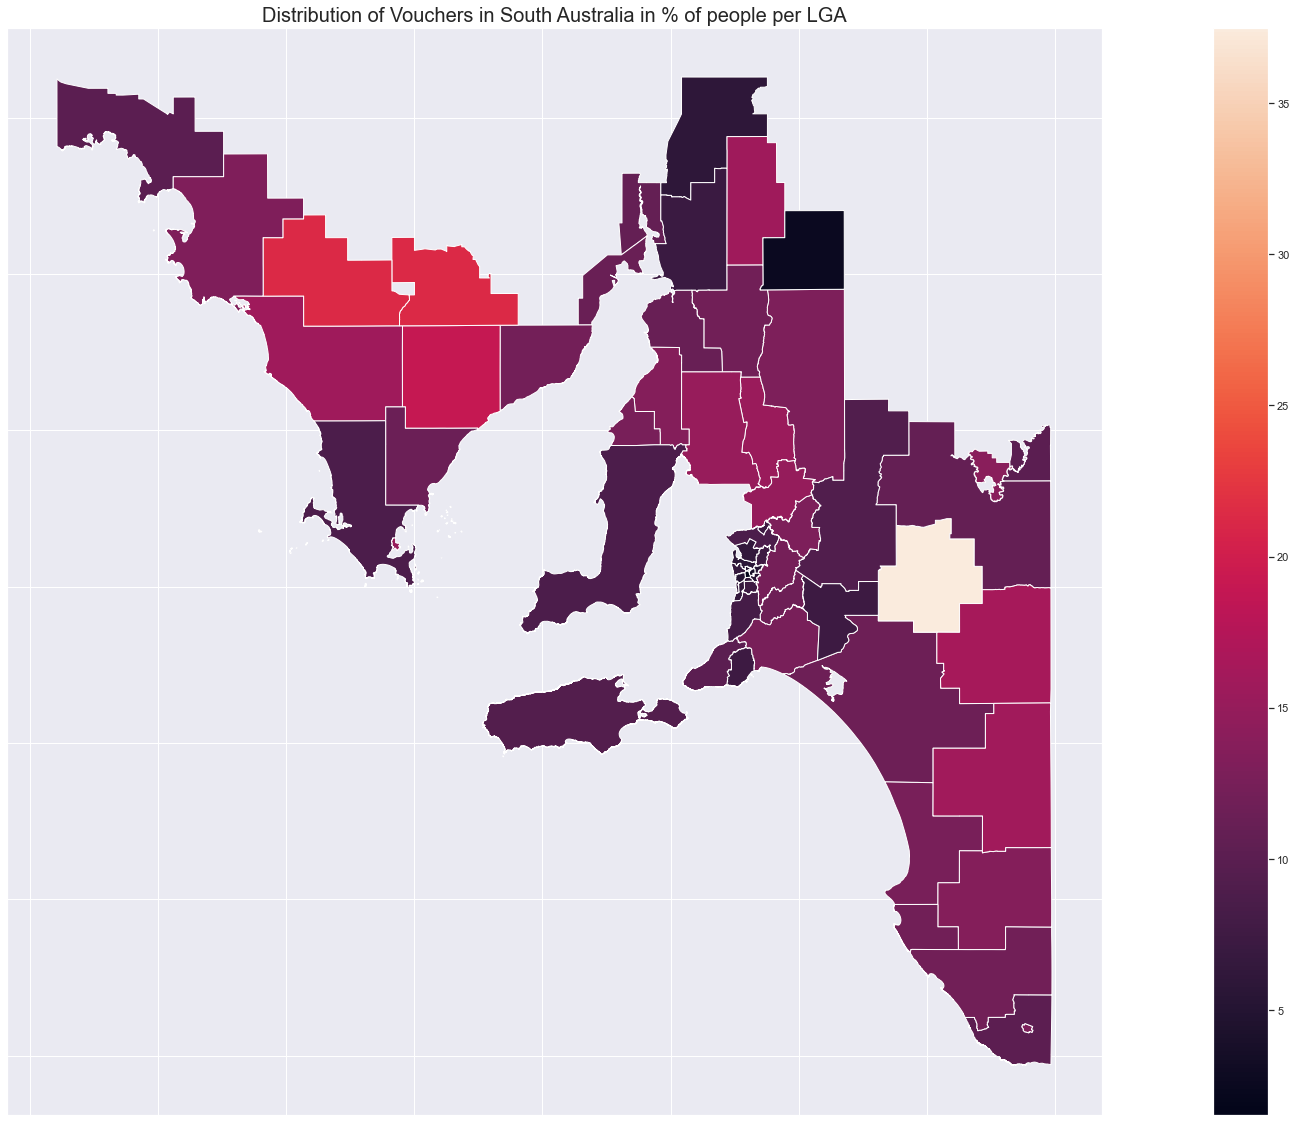

In [72]:
# plot map
plt.rcParams["figure.figsize"] = (40, 20)
plot_proportion.plot(column='Voucher_Per_100', legend=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.title("Distribution of Vouchers in South Australia in % of people per LGA", fontsize=20);

__Findings of LGA analysis:__

For this analysis, it can be seen that, first, the distribution of redeemed vouchers has changed by a lot and, second, the distribution is more even than without taking population size into consideration.<br >
For example, in Karoonda East Murray, only 388 vouchers were redeemed which puts them at the lower end of number of vouchers per LGA. However, after considering population size, it becomes clear that out of 100 people in this LGA, around 38 redeem sports vouchers which indicates an overrepresentation in this LGA since almost 4 times as many people redeem vouchers compared to the average value. On the contrary, there is the city of Adelaide where only 1.54 percent of people redeem vouchers which is almost only a tenth of the average voucher redemption when population is considered.
From the last map, it can also be seen that the overrepresentation of voucher usage seems to apply especially to rural areas while the metropolitan area around Adelaide seems to be underrepresentated. In the following it will be analysed, if there is a relationship between the voucher usage and socioeconomic factors.

# Is there a relationship between any of the SEIFA measures and voucher use in an LGA?


In [73]:
LGA_scores

INDEX_TYPE              IEO   IER  IRSAD  IRSD  Population
LGA                                                       
ADELAIDE                874   874   1036  1013       19606
ADELAIDE HILLS         1083  1083   1077  1081       38601
ALEXANDRINA            1000  1000    969   987       23693
ANANGU PITJANTJATJARA   623   623    672   593        2433
BAROSSA                1028  1028    997  1017       22174
...                     ...   ...    ...   ...         ...
WEST TORRENS            949   949    989   998       54932
WHYALLA                 905   905    897   905       22070
WUDINNA                1008  1008    999  1023        1256
YANKALILLA              990   990    957   972        4406
YORKE PENINSULA         969   969    933   952       11046

[71 rows x 5 columns]

In [74]:
pop_lga = pop_lga.set_index('Participant_LGA').sort_index()
pop_lga

Population  Voucher_Count  Voucher_prop  Voucher_Per_100
Participant_LGA                                                          
ADELAIDE              19606            302          0.24             1.54
ADELAIDE HILLS        38601           4756          3.73            12.32
ALEXANDRINA           23693           2979          2.34            12.57
BAROSSA               22174           2874          2.25            12.96
BARUNGA WEST           2467            333          0.26            13.50
...                     ...            ...           ...              ...
WEST TORRENS          54932           2844          2.23             5.18
WHYALLA               22070           2488          1.95            11.27
WUDINNA                1256            267          0.21            21.26
YANKALILLA             4406            443          0.35            10.05
YORKE PENINSULA       11046            977          0.77             8.84

[69 rows x 4 columns]

__Note:__ There are two records less in the pop_lga DataFrame than in the LGA_scores DataFrame. This is because these two records got lost when joining the SEIFA data on the Voucher data as there are no Voucher data for them. Since there is no voucher data on them, these will not be considered.

In [75]:
# join on lga
LGA_scores = pd.merge(LGA_scores, pop_lga['Voucher_Per_100'], how='inner', left_index=True, right_index=True)
LGA_scores

IEO   IER  IRSAD  IRSD  Population  Voucher_Per_100
ADELAIDE          874   874   1036  1013       19606             1.54
ADELAIDE HILLS   1083  1083   1077  1081       38601            12.32
ALEXANDRINA      1000  1000    969   987       23693            12.57
BAROSSA          1028  1028    997  1017       22174            12.96
BARUNGA WEST      981   981    940   954        2467            13.50
...               ...   ...    ...   ...         ...              ...
WEST TORRENS      949   949    989   998       54932             5.18
WHYALLA           905   905    897   905       22070            11.27
WUDINNA          1008  1008    999  1023        1256            21.26
YANKALILLA        990   990    957   972        4406            10.05
YORKE PENINSULA   969   969    933   952       11046             8.84

[69 rows x 6 columns]

In [76]:
sa_vouchers_scores

Participant_ID Participant_Suburb       Club_Previous_Member  \
0              1000002     ABERFOYLE PARK      Registered Previously   
1              1000002     ABERFOYLE PARK      Registered Previously   
2              1000004     ABERFOYLE PARK  Not Registered Previously   
3              1000004     ABERFOYLE PARK      Registered Previously   
4              1000005     ABERFOYLE PARK      Registered Previously   
...                ...                ...                        ...   
127521         1127524     ZADOWS LANDING      Registered Previously   
127522         1127524     ZADOWS LANDING      Registered Previously   
127523         1127524     ZADOWS LANDING      Registered Previously   
127524         1127526     ZADOWS LANDING      Registered Previously   
127525         1127526     ZADOWS LANDING      Registered Previously   

       Participant_ATSI_Indicator Participant_CALD_Indicator Participant_Sex  \
0                        Not ATSI                   Not CALD            Male   
1                        Not ATSI                   Not CALD            Male   
2                        Not ATSI                   Not CALD          Female   
3                        Not ATSI                   Not CALD          Female   
4                        Not ATSI                   Not CALD          Female   
...                           ...                        ...             ...   
127521                   Not ATSI                   Not CALD          Female   
127522                   Not ATSI                   Not CALD          Female   
127523                   Not ATSI                   Not CALD          Female   
127524                   Not ATSI                   Not CALD          Female   
127525                   Not ATSI                   Not CALD          Female   

        Voucher_Value                                   Club_Name  \
0                  50                Flagstaff Hill Football Club   
1                  50                Flagstaff Hill Football Club   
2                  50                         Hub Gymnastics Club   
3                  50                         Hub Gymnastics Club   
4                  50  Blackwood Community Recreation Association   
...               ...                                         ...   
127521             50                    Mannum Roos Netball Club   
127522             50                    Mannum Roos Netball Club   
127523             50                    Mannum Roos Netball Club   
127524             50                    Mannum Roos Netball Club   
127525             50                    Mannum Roos Netball Club   

           Voucher_Sport Participant_LGA Participant_Electorate  \
0       Australian Rules     ONKAPARINGA                 FISHER   
1       Australian Rules     ONKAPARINGA                 FISHER   
2             Gymnastics     ONKAPARINGA                 FISHER   
3             Gymnastics     ONKAPARINGA                 FISHER   
4             Gymnastics     ONKAPARINGA                 FISHER   
...                  ...             ...                    ...   
127521           Netball      MID MURRAY               SCHUBERT   
127522           Netball      MID MURRAY               SCHUBERT   
127523           Netball      MID MURRAY               SCHUBERT   
127524           Netball      MID MURRAY               SCHUBERT   
127525           Netball      MID MURRAY               SCHUBERT   

       Voucher_Completion_Date  Voucher_Claim_Year  IEO  IER  IRSAD  IRSD  \
0                 26/6/15 1:19                2015  996  996    975   993   
1                29/6/16 23:55                2016  996  996    975   993   
2                 21/4/16 3:37                2016  996  996    975   993   
3                 30/3/17 0:47                2017  996  996    975   993   
4                 20/7/15 2:50                2015  996  996    975   993   
...                        ...                 ...  ...  ...    ...   ...   
127521   

## Conduct bivariate analysis of variables with target variable

In [77]:
sa_vouchers_scores.head()

Participant_ID Participant_Suburb       Club_Previous_Member  \
0         1000002     ABERFOYLE PARK      Registered Previously   
1         1000002     ABERFOYLE PARK      Registered Previously   
2         1000004     ABERFOYLE PARK  Not Registered Previously   
3         1000004     ABERFOYLE PARK      Registered Previously   
4         1000005     ABERFOYLE PARK      Registered Previously   

  Participant_ATSI_Indicator Participant_CALD_Indicator Participant_Sex  \
0                   Not ATSI                   Not CALD            Male   
1                   Not ATSI                   Not CALD            Male   
2                   Not ATSI                   Not CALD          Female   
3                   Not ATSI                   Not CALD          Female   
4                   Not ATSI                   Not CALD          Female   

   Voucher_Value                                   Club_Name  \
0             50                Flagstaff Hill Football Club   
1             50                Flagstaff Hill Football Club   
2             50                         Hub Gymnastics Club   
3             50                         Hub Gymnastics Club   
4             50  Blackwood Community Recreation Association   

      Voucher_Sport Participant_LGA Participant_Electorate  \
0  Australian Rules     ONKAPARINGA                 FISHER   
1  Australian Rules     ONKAPARINGA                 FISHER   
2        Gymnastics     ONKAPARINGA                 FISHER   
3        Gymnastics     ONKAPARINGA                 FISHER   
4        Gymnastics     ONKAPARINGA                 FISHER   

  Voucher_Completion_Date  Voucher_Claim_Year  IEO  IER  IRSAD  IRSD  \
0            26/6/15 1:19                2015  996  996    975   993   
1           29/6/16 23:55                2016  996  996    975   993   
2            21/4/16 3:37                2016  996  996    975   993   
3            30/3/17 0:47                2017  996  996    975   993   
4            20/7/15 2:50                2015  996  996    975   993   

   Population  
0      159517  
1      159517  
2      159517  
3      159517  
4      159517

In [78]:
# remove unneeded columns
sa_master = sa_vouchers_scores.drop(["Participant_Suburb", 
                                 "Club_Previous_Member",  
                                 "Club_Name", 
                                 "Voucher_Sport", 
                                 "Participant_Electorate", 
                                 "Voucher_Completion_Date"], 
                               axis=1)
sa_master

Participant_ID Participant_ATSI_Indicator Participant_CALD_Indicator  \
0              1000002                   Not ATSI                   Not CALD   
1              1000002                   Not ATSI                   Not CALD   
2              1000004                   Not ATSI                   Not CALD   
3              1000004                   Not ATSI                   Not CALD   
4              1000005                   Not ATSI                   Not CALD   
...                ...                        ...                        ...   
127521         1127524                   Not ATSI                   Not CALD   
127522         1127524                   Not ATSI                   Not CALD   
127523         1127524                   Not ATSI                   Not CALD   
127524         1127526                   Not ATSI                   Not CALD   
127525         1127526                   Not ATSI                   Not CALD   

       Participant_Sex  Voucher_Value Participant_LGA  Voucher_Claim_Year  \
0                 Male             50     ONKAPARINGA                2015   
1                 Male             50     ONKAPARINGA                2016   
2               Female             50     ONKAPARINGA                2016   
3               Female             50     ONKAPARINGA                2017   
4               Female             50     ONKAPARINGA                2015   
...                ...            ...             ...                 ...   
127521          Female             50      MID MURRAY                2016   
127522          Female             50      MID MURRAY                2015   
127523          Female             50      MID MURRAY                2017   
127524          Female             50      MID MURRAY                2015   
127525          Female             50      MID MURRAY                2016   

        IEO  IER  IRSAD  IRSD  Population  
0       996  996    975   993      159517  
1       996  996    975   993      159517  
2       996  996    975   993      159517  
3       996  996    975   993      159517  
4       996  996    975   993      159517  
...     ...  ...    ...   ...         ...  
127521  965  965    917   937        8134  
127522  965  965    917   937        8134  
127523  965  965    917   937        8134  
127524  965  965    917   937        8134  
127525  965  965    917   937        8134  

[127526 rows x 12 columns]

In [79]:
sa_master.dtypes

Participant_ID                 int64
Participant_ATSI_Indicator    object
Participant_CALD_Indicator    object
Participant_Sex               object
Voucher_Value                  int64
Participant_LGA               object
Voucher_Claim_Year             int64
IEO                            int64
IER                            int64
IRSAD                          int64
IRSD                           int64
Population                     int64
dtype: object

In [80]:
# for loop to change some columns to categorical dtype
for col in ['Participant_ID', 'Voucher_Claim_Year']:
    sa_master[col] = sa_master[col].astype('category')
    
sa_master.dtypes

Participant_ID                category
Participant_ATSI_Indicator      object
Participant_CALD_Indicator      object
Participant_Sex                 object
Voucher_Value                    int64
Participant_LGA                 object
Voucher_Claim_Year            category
IEO                              int64
IER                              int64
IRSAD                            int64
IRSD                             int64
Population                       int64
dtype: object

In [81]:
# merge voucher amount into master df
sa_master = pd.merge(sa_master, 
                 pop_lga, 
                 how='inner', 
                 left_on='Participant_LGA', 
                 right_index=True)
sa_master = sa_master.drop(['Population_y', 'Voucher_prop'], axis=1) 
sa_master

Participant_ID Participant_ATSI_Indicator Participant_CALD_Indicator  \
0            1000002                   Not ATSI                   Not CALD   
1            1000002                   Not ATSI                   Not CALD   
2            1000004                   Not ATSI                   Not CALD   
3            1000004                   Not ATSI                   Not CALD   
4            1000005                   Not ATSI                   Not CALD   
...              ...                        ...                        ...   
97982        1097983                   Not ATSI                   Not CALD   
97983        1097984                   Not ATSI                   Not CALD   
97984        1097985                   Not ATSI                   Not CALD   
97985        1097986                   Not ATSI                   Not CALD   
97986        1097987                   Not ATSI                   Not CALD   

      Participant_Sex  Voucher_Value Participant_LGA Voucher_Claim_Year   IEO  \
0                Male             50     ONKAPARINGA               2015   996   
1                Male             50     ONKAPARINGA               2016   996   
2              Female             50     ONKAPARINGA               2016   996   
3              Female             50     ONKAPARINGA               2017   996   
4              Female             50     ONKAPARINGA               2015   996   
...               ...            ...             ...                ...   ...   
97982          Female             50     ROXBY DOWNS               2017  1066   
97983            Male             50     ROXBY DOWNS               2016  1066   
97984            Male             50     ROXBY DOWNS               2016  1066   
97985            Male             50     ROXBY DOWNS               2016  1066   
97986            Male             50     ROXBY DOWNS               2016  1066   

        IER  IRSAD  IRSD  Population_x  Voucher_Count  Voucher_Per_100  
0       996    975   993        159517          12782             8.01  
1       996    975   993        159517          12782             8.01  
2       996    975   993        159517          12782             8.01  
3       996    975   993        159517          12782             8.01  
4       996    975   993        159517          12782             8.01  
...     ...    ...   ...           ...            ...              ...  
97982  1066   1086  1096          4694            234             4.99  
97983  1066   1086  1096          4694            234             4.99  
97984  1066   1086  1096          4694            234             4.99  
97985  1066   1086  1096          4694            234             4.99  
97986  1066   1086  1096          4694            234             4.99  

[127526 rows x 14 columns]

In [82]:
# rename some columns
sa_master = sa_master.rename(columns={'Population_x': 'Population',
                                      'Participant_LGA': 'LGA',
                                      'Voucher_Claim_Year': 'Year', 
                                      'Voucher_Per_100': 'Voucher_Pop100'})
sa_master 

Participant_ID Participant_ATSI_Indicator Participant_CALD_Indicator  \
0            1000002                   Not ATSI                   Not CALD   
1            1000002                   Not ATSI                   Not CALD   
2            1000004                   Not ATSI                   Not CALD   
3            1000004                   Not ATSI                   Not CALD   
4            1000005                   Not ATSI                   Not CALD   
...              ...                        ...                        ...   
97982        1097983                   Not ATSI                   Not CALD   
97983        1097984                   Not ATSI                   Not CALD   
97984        1097985                   Not ATSI                   Not CALD   
97985        1097986                   Not ATSI                   Not CALD   
97986        1097987                   Not ATSI                   Not CALD   

      Participant_Sex  Voucher_Value          LGA  Year   IEO   IER  IRSAD  \
0                Male             50  ONKAPARINGA  2015   996   996    975   
1                Male             50  ONKAPARINGA  2016   996   996    975   
2              Female             50  ONKAPARINGA  2016   996   996    975   
3              Female             50  ONKAPARINGA  2017   996   996    975   
4              Female             50  ONKAPARINGA  2015   996   996    975   
...               ...            ...          ...   ...   ...   ...    ...   
97982          Female             50  ROXBY DOWNS  2017  1066  1066   1086   
97983            Male             50  ROXBY DOWNS  2016  1066  1066   1086   
97984            Male             50  ROXBY DOWNS  2016  1066  1066   1086   
97985            Male             50  ROXBY DOWNS  2016  1066  1066   1086   
97986            Male             50  ROXBY DOWNS  2016  1066  1066   1086   

       IRSD  Population  Voucher_Count  Voucher_Pop100  
0       993      159517          12782            8.01  
1       993      159517          12782            8.01  
2       993      159517          12782            8.01  
3       993      159517          12782            8.01  
4       993      159517          12782            8.01  
...     ...         ...            ...             ...  
97982  1096        4694            234            4.99  
97983  1096        4694            234            4.99  
97984  1096        4694            234            4.99  
97985  1096        4694            234            4.99  
97986  1096        4694            234            4.99  

[127526 rows x 14 columns]

In [83]:
# show correlation matrix
sa_master.corr()

Voucher_Value       IEO       IER     IRSAD      IRSD  \
Voucher_Value        1.000000  0.034680  0.034680  0.052854  0.044247   
IEO                  0.034680  1.000000  1.000000  0.858084  0.897162   
IER                  0.034680  1.000000  1.000000  0.858084  0.897162   
IRSAD                0.052854  0.858084  0.858084  1.000000  0.990664   
IRSD                 0.044247  0.897162  0.897162  0.990664  1.000000   
Population           0.089624 -0.076928 -0.076928 -0.037065 -0.038504   
Voucher_Count        0.092152  0.005343  0.005343 -0.037635 -0.024259   
Voucher_Pop100      -0.108565  0.153446  0.153446 -0.133690 -0.075161   

                Population  Voucher_Count  Voucher_Pop100  
Voucher_Value     0.089624       0.092152       -0.108565  
IEO              -0.076928       0.005343        0.153446  
IER              -0.076928       0.005343        0.153446  
IRSAD            -0.037065      -0.037635       -0.133690  
IRSD             -0.038504      -0.024259       -0.075161  
Population        1.000000       0.962873       -0.538949  
Voucher_Count     0.962873       1.000000       -0.383350  
Voucher_Pop100   -0.538949      -0.383350        1.000000

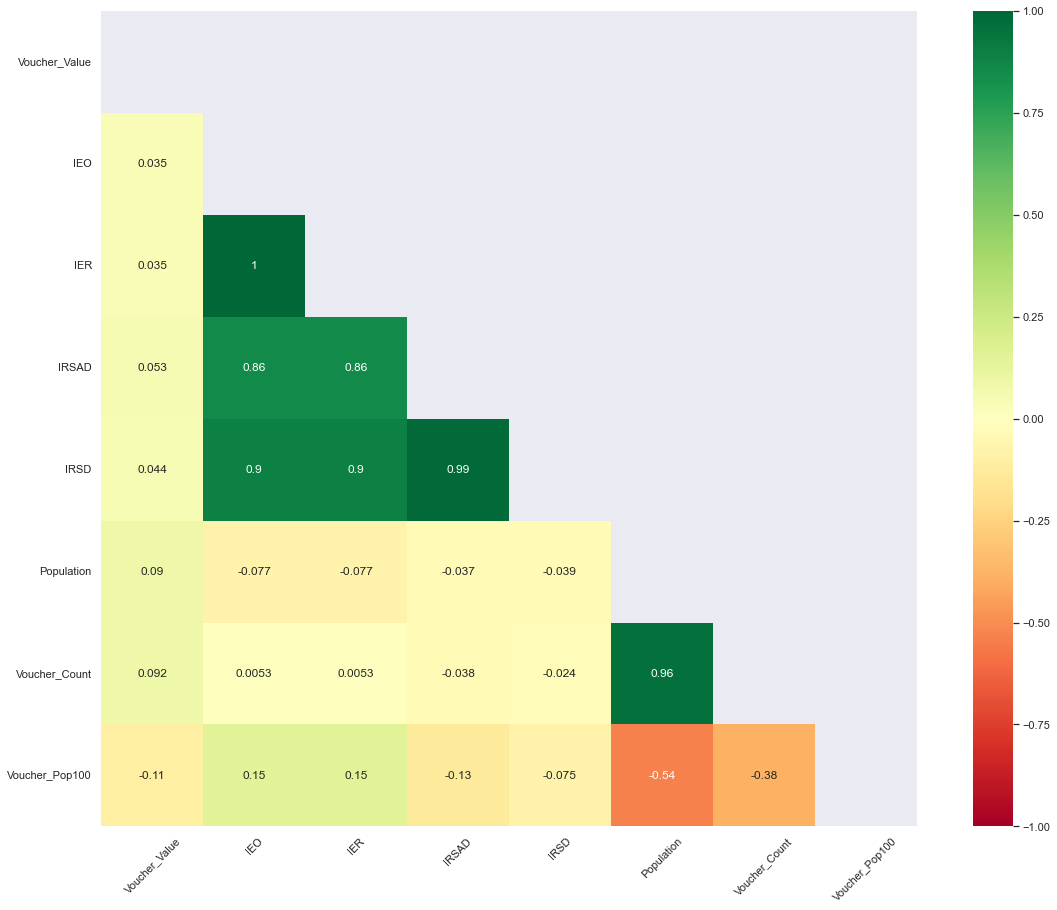

In [84]:
# make correlation more visually appealling
plt.figure(figsize=(20, 15))

matrix = np.triu(sa_master.corr())

sns.heatmap(sa_master.corr(), 
            annot=True, # put coefficients in
            fmt='.2g', # set number of decimals
            vmin=-1, vmax=1, center=0, # rescale colorbar
            cmap='RdYlGn', # set color palette
            square=True, # set squares
            mask=matrix) # display only lower triangular matrix
plt.yticks(rotation=360)
plt.xticks(rotation=45);

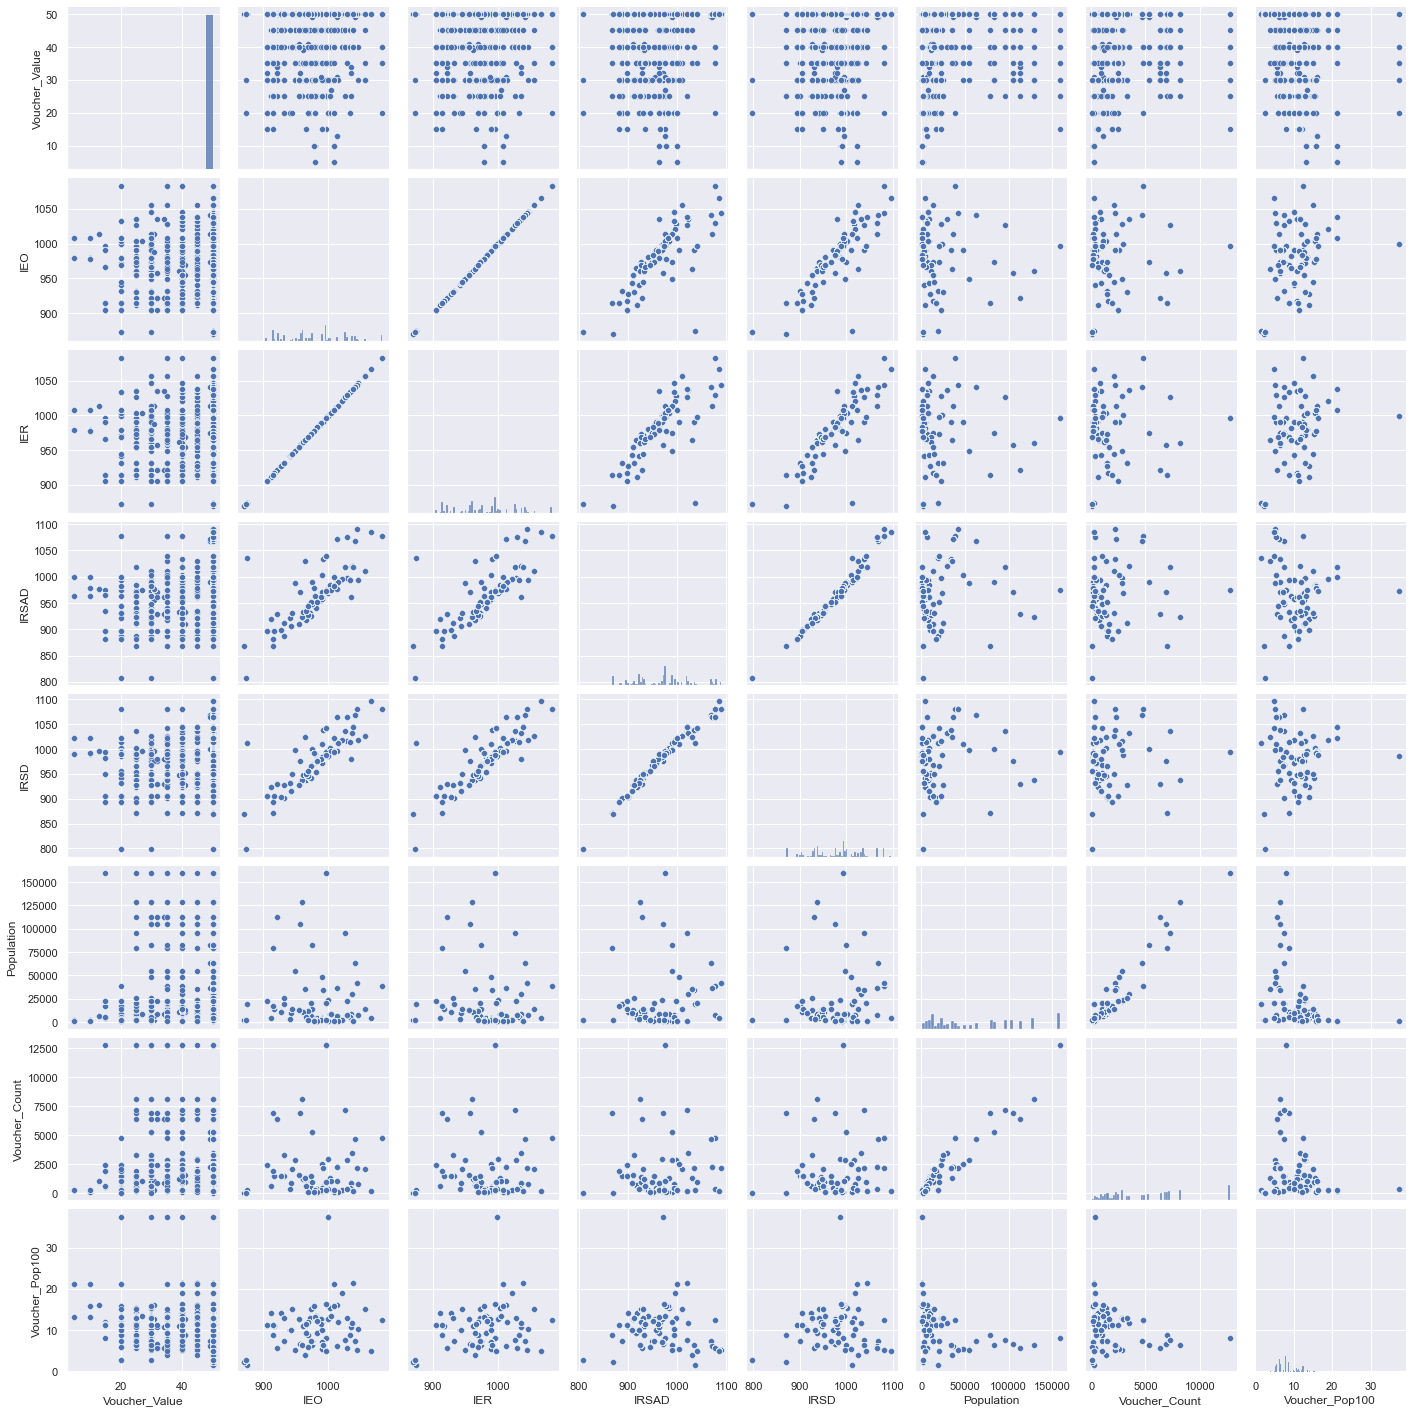

In [85]:
# show variable in pairplot
sns.pairplot(sa_master);

__Findings:__
From the above correlation matrix it can be seen that there is no relationship between any of the seifa measures and voucher use in LGAs. This especially true when population is not considered as correlations are almost zero for all measures. This is slightly mitigated when population is considered, however, correlations are still very weak and no relationships can be assumed.

# Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

# To Do
- check missing values and check if it is due to some LGA names being non-identical
- show all sport names to do a mapping 
- do some group analysis as for SA

In [286]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

Application Number Voucher Number  Child Age (at time of Application)  \
0          2000012253       Q89QDUXP                                  10   
1          2000001727       593F6Y41                                   5   
2          2000013464       PH2R4RTT                                   5   
3          2000009270       035SE2H5                                   5   
4          2000007273       NP6C4729                                   6   

   Gender Has your child played sport before? Participation Activity  \
0     NaN                                 Yes                 *Other   
1     NaN                                  No                 *Other   
2     NaN                                  No                 *Other   
3     NaN                                 Yes                 *Other   
4     NaN                                  No                 *Other   

                                           Club Name Club Suburb/Town  \
0  Queensland Police-Citizens Youth Welfare Assoc...     Airlie Beach   
1                                  Guides Queensland          Windsor   
2                                  Guides Queensland          Windsor   
3                                  Guides Queensland          Windsor   
4                                  Guides Queensland          Windsor   

  Club Local Government Area Name Club State Electoral District  Name  \
0                  Whitsunday (R)                          Whitsunday   
1                    Brisbane (C)                    Brisbane Central   
2                    Brisbane (C)                    Brisbane Central   
3                    Brisbane (C)                    Brisbane Central   
4                    Brisbane (C)                    Brisbane Central   

  Parent Suburb/Town  Total Payment  
0     Jubilee Pocket          60.01  
1         Leichhardt         150.00  
2          Woodridge         150.00  
3             Yatala         150.00  
4    Alexandra Hills         150.00

In [287]:
# read the SEIFA data for queensland, create an LGA column by removing the letters in brackets and converting to uppercase
qld_seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
qld_seifa = qld_seifa[qld_seifa['LGA_2011'].astype(str).str[0] == '3'].reset_index()
lga = qld_seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMTGE]+\)', 
                                                             '', 
                                                             regex=True,
                                                             case=False).str.upper()
qld_seifa['LGA'] = lga
qld_seifa

index  LGA_2011 Local Government Areas - 2011 INDEX_TYPE  \
0       932     30250                   Aurukun (S)      IRSAD   
1       933     30250                   Aurukun (S)      IRSAD   
2       934     30250                   Aurukun (S)      IRSAD   
3       935     30250                   Aurukun (S)      IRSAD   
4       936     30300                   Balonne (S)      IRSAD   
...     ...       ...                           ...        ...   
1179   7991     37570               Wujal Wujal (S)        IEO   
1180   7992     37600                  Yarrabah (S)        IEO   
1181   7993     37600                  Yarrabah (S)        IEO   
1182   7994     37600                  Yarrabah (S)        IEO   
1183   7995     37600                  Yarrabah (S)        IEO   

                                             Index Type MEASURE  \
0     Index of Relative Socio-economic Advantage and...   SCORE   
1     Index of Relative Socio-economic Advantage and...    MINS   
2     Index of Relative Socio-economic Advantage and...    MAXS   
3     Index of Relative Socio-economic Advantage and...     URP   
4     Index of Relative Socio-economic Advantage and...   SCORE   
...                                                 ...     ...   
1179                  Index of Education and Occupation     URP   
1180                  Index of Education and Occupation   SCORE   
1181                  Index of Education and Occupation    MINS   
1182                  Index of Education and Occupation    MAXS   
1183                  Index of Education and Occupation     URP   

                             Measure  Value          LGA  
0                              Score    586      AURUKUN  
1     Minimum score for SA1s in area    586      AURUKUN  
2     Maximum score for SA1s in area    586      AURUKUN  
3          Usual resident population   1292      AURUKUN  
4                              Score    950      BALONNE  
...                              ...    ...          ...  
1179       Usual resident population    269  WUJAL WUJAL  
1180                           Score    472     YARRABAH  
1181  Minimum score for SA1s in area    469     YARRABAH  
1182  Maximum score for SA1s in area    475     YARRABAH  
1183       Usual resident population   2406     YARRABAH  

[1184 rows x 9 columns]

Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [288]:
LGA_qld_scores = qld_seifa[qld_seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_qld_scores.head()
LGA_pop = qld_seifa[qld_seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_qld_scores['Population'] = LGA_pop.IEO
LGA_qld_scores

INDEX_TYPE    IEO   IER  IRSAD  IRSD  Population
LGA                                             
AURUKUN       521   521    586   483        1292
BALONNE       973   973    950   959        4719
BANANA       1017  1017    980   997       14451
BARCALDINE    998   998    974   992        3217
BARCOO        989   989    947   953         352
...           ...   ...    ...   ...         ...
WHITSUNDAY    989   989    966   982       31393
WINTON        964   964    931   944        1338
WOORABINDA    512   512    592   510         942
WUJAL WUJAL   617   617    697   655         269
YARRABAH      472   472    554   441        2406

[74 rows x 5 columns]

In [289]:
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RCS]+\)', 
                                                                                  '',
                                                                                  regex=True).str.upper()

In [290]:
qld_vouchers[qld_vouchers['LGA'].str.contains('HERVEY BAY', regex=True)]

Application Number Voucher Number  Child Age (at time of Application)  \
161          2000008574       WDRMH6YE                                  11   
179          2000008575       U7QN7785                                  15   
180          2000008576       95943DP2                                  16   

     Gender Has your child played sport before? Participation Activity  \
161     NaN                                 Yes    Australian Football   
179     NaN                                 Yes    Australian Football   
180     NaN                                 Yes    Australian Football   

                                  Club Name Club Suburb/Town  \
161  BAY POWER AUSTRALIAN FOOTBALL CLUB INC          Urangan   
179  BAY POWER AUSTRALIAN FOOTBALL CLUB INC          Urangan   
180  BAY POWER AUSTRALIAN FOOTBALL CLUB INC          Urangan   

    Club Local Government Area Name Club State Electoral District  Name  \
161                      Hervey Bay                          Hervey Bay   
179                      Hervey Bay                          Hervey Bay   
180                      Hervey Bay                          Hervey Bay   

    Parent Suburb/Town  Total Payment         LGA  
161       Point Vernon           90.0  HERVEY BAY  
179       Point Vernon          100.0  HERVEY BAY  
180       Point Vernon          100.0  HERVEY BAY

In [291]:
#replace wrong LGA name
qld_vouchers['LGA'] = qld_vouchers['LGA'].replace({'HERVEY BAY':'FRASER COAST'})
qld_vouchers[qld_vouchers['LGA'].str.contains('HERVEY BAY', regex=True)]

Empty DataFrame
Columns: [Application Number, Voucher Number, Child Age (at time of Application), Gender, Has your child played sport before?, Participation Activity, Club Name, Club Suburb/Town, Club Local Government Area Name, Club State Electoral District  Name, Parent Suburb/Town, Total Payment, LGA]
Index: []

In [292]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated



qld_vouchers_scores = qld_vouchers.join(LGA_qld_scores, on='LGA')
qld_vouchers_scores.head()

Application Number Voucher Number  Child Age (at time of Application)  \
0          2000012253       Q89QDUXP                                  10   
1          2000001727       593F6Y41                                   5   
2          2000013464       PH2R4RTT                                   5   
3          2000009270       035SE2H5                                   5   
4          2000007273       NP6C4729                                   6   

   Gender Has your child played sport before? Participation Activity  \
0     NaN                                 Yes                 *Other   
1     NaN                                  No                 *Other   
2     NaN                                  No                 *Other   
3     NaN                                 Yes                 *Other   
4     NaN                                  No                 *Other   

                                           Club Name Club Suburb/Town  \
0  Queensland Police-Citizens Youth Welfare Assoc...     Airlie Beach   
1                                  Guides Queensland          Windsor   
2                                  Guides Queensland          Windsor   
3                                  Guides Queensland          Windsor   
4                                  Guides Queensland          Windsor   

  Club Local Government Area Name Club State Electoral District  Name  \
0                  Whitsunday (R)                          Whitsunday   
1                    Brisbane (C)                    Brisbane Central   
2                    Brisbane (C)                    Brisbane Central   
3                    Brisbane (C)                    Brisbane Central   
4                    Brisbane (C)                    Brisbane Central   

  Parent Suburb/Town  Total Payment         LGA     IEO     IER   IRSAD  \
0     Jubilee Pocket          60.01  WHITSUNDAY   989.0   989.0   966.0   
1         Leichhardt         150.00    BRISBANE  1018.0  1018.0  1057.0   
2          Woodridge         150.00    BRISBANE  1018.0  1018.0  1057.0   
3             Yatala         150.00    BRISBANE  1018.0  1018.0  1057.0   
4    Alexandra Hills         150.00    BRISBANE  1018.0  1018.0  1057.0   

     IRSD  Population  
0   982.0     31393.0  
1  1048.0   1042074.0  
2  1048.0   1042074.0  
3  1048.0   1042074.0  
4  1048.0   1042074.0

In [293]:
# remove unnecessary columns
qld_vouchers_scores = qld_vouchers_scores.drop(['Application Number', 
                                                'Voucher Number', 
                                                'Club Name', 
                                                'Club Suburb/Town', 
                                                'Club State Electoral District  Name',
                                                'Parent Suburb/Town',
                                                'Gender'], # no values
                                              axis=1)
qld_vouchers_scores

Child Age (at time of Application) Has your child played sport before?  \
0                                     10                                 Yes   
1                                      5                                  No   
2                                      5                                  No   
3                                      5                                 Yes   
4                                      6                                  No   
...                                  ...                                 ...   
9502                                   5                                  No   
9503                                   6                                  No   
9504                                  13                                  No   
9505                                  15                                  No   
9506                                  16                                  No   

       Participation Activity Club Local Government Area Name  Total Payment  \
0                      *Other                  Whitsunday (R)          60.01   
1                      *Other                    Brisbane (C)         150.00   
2                      *Other                    Brisbane (C)         150.00   
3                      *Other                    Brisbane (C)         150.00   
4                      *Other                    Brisbane (C)         150.00   
...                       ...                             ...            ...   
9502  Zen Do Kai Martial Arts                Fraser Coast (R)         150.00   
9503  Zen Do Kai Martial Arts                Fraser Coast (R)         150.00   
9504  Zen Do Kai Martial Arts                Fraser Coast (R)         150.00   
9505  Zen Do Kai Martial Arts                Fraser Coast (R)         150.00   
9506  Zen Do Kai Martial Arts                Fraser Coast (R)         150.00   

               LGA     IEO     IER   IRSAD    IRSD  Population  
0       WHITSUNDAY   989.0   989.0   966.0   982.0     31393.0  
1         BRISBANE  1018.0  1018.0  1057.0  1048.0   1042074.0  
2         BRISBANE  1018.0  1018.0  1057.0  1048.0   1042074.0  
3         BRISBANE  1018.0  1018.0  1057.0  1048.0   1042074.0  
4         BRISBANE  1018.0  1018.0  1057.0  1048.0   1042074.0  
...            ...     ...     ...     ...     ...         ...  
9502  FRASER COAST   947.0   947.0   908.0   917.0     95348.0  
9503  FRASER COAST   947.0   947.0   908.0   917.0     95348.0  
9504  FRASER COAST   947.0   947.0   908.0   917.0     95348.0  
9505  FRASER COAST   947.0   947.0   908.0   917.0     95348.0  
9506  FRASER COAST   947.0   947.0   908.0   917.0     95348.0  

[9507 rows x 11 columns]

In [294]:
# rename columns
qld_vouchers_scores = qld_vouchers_scores.rename(columns={'Child Age (at time of Application)': 'Age',
                                                          'Has your child played sport before?': 'Sports_before',
                                                          'Participation Activity': 'Voucher_Sport',
                                                          'Total Payment': 'Voucher_Value'})
qld_vouchers_scores

Age Sports_before            Voucher_Sport  \
0      10           Yes                   *Other   
1       5            No                   *Other   
2       5            No                   *Other   
3       5           Yes                   *Other   
4       6            No                   *Other   
...   ...           ...                      ...   
9502    5            No  Zen Do Kai Martial Arts   
9503    6            No  Zen Do Kai Martial Arts   
9504   13            No  Zen Do Kai Martial Arts   
9505   15            No  Zen Do Kai Martial Arts   
9506   16            No  Zen Do Kai Martial Arts   

     Club Local Government Area Name  Voucher_Value           LGA     IEO  \
0                     Whitsunday (R)          60.01    WHITSUNDAY   989.0   
1                       Brisbane (C)         150.00      BRISBANE  1018.0   
2                       Brisbane (C)         150.00      BRISBANE  1018.0   
3                       Brisbane (C)         150.00      BRISBANE  1018.0   
4                       Brisbane (C)         150.00      BRISBANE  1018.0   
...                              ...            ...           ...     ...   
9502                Fraser Coast (R)         150.00  FRASER COAST   947.0   
9503                Fraser Coast (R)         150.00  FRASER COAST   947.0   
9504                Fraser Coast (R)         150.00  FRASER COAST   947.0   
9505                Fraser Coast (R)         150.00  FRASER COAST   947.0   
9506                Fraser Coast (R)         150.00  FRASER COAST   947.0   

         IER   IRSAD    IRSD  Population  
0      989.0   966.0   982.0     31393.0  
1     1018.0  1057.0  1048.0   1042074.0  
2     1018.0  1057.0  1048.0   1042074.0  
3     1018.0  1057.0  1048.0   1042074.0  
4     1018.0  1057.0  1048.0   1042074.0  
...      ...     ...     ...         ...  
9502   947.0   908.0   917.0     95348.0  
9503   947.0   908.0   917.0     95348.0  
9504   947.0   908.0   917.0     95348.0  
9505   947.0   908.0   917.0     95348.0  
9506   947.0   908.0   917.0     95348.0  

[9507 rows x 11 columns]

In [353]:
qld_vouchers_scores['Voucher_Sport'] = qld_vouchers_scores['Voucher_Sport'].str.replace('\*Other',
                                                                                        'Other',
                                                                                        regex=True)
qld_vouchers_scores

Age Sports_before            Voucher_Sport  \
0      10           Yes                    Other   
1       5            No                    Other   
2       5            No                    Other   
3       5           Yes                    Other   
4       6            No                    Other   
...   ...           ...                      ...   
9502    5            No  Zen Do Kai Martial Arts   
9503    6            No  Zen Do Kai Martial Arts   
9504   13            No  Zen Do Kai Martial Arts   
9505   15            No  Zen Do Kai Martial Arts   
9506   16            No  Zen Do Kai Martial Arts   

     Club Local Government Area Name  Voucher_Value           LGA     IEO  \
0                     Whitsunday (R)          60.01    WHITSUNDAY   989.0   
1                       Brisbane (C)         150.00      BRISBANE  1018.0   
2                       Brisbane (C)         150.00      BRISBANE  1018.0   
3                       Brisbane (C)         150.00      BRISBANE  1018.0   
4                       Brisbane (C)         150.00      BRISBANE  1018.0   
...                              ...            ...           ...     ...   
9502                Fraser Coast (R)         150.00  FRASER COAST   947.0   
9503                Fraser Coast (R)         150.00  FRASER COAST   947.0   
9504                Fraser Coast (R)         150.00  FRASER COAST   947.0   
9505                Fraser Coast (R)         150.00  FRASER COAST   947.0   
9506                Fraser Coast (R)         150.00  FRASER COAST   947.0   

         IER   IRSAD    IRSD  Population  
0      989.0   966.0   982.0     31393.0  
1     1018.0  1057.0  1048.0   1042074.0  
2     1018.0  1057.0  1048.0   1042074.0  
3     1018.0  1057.0  1048.0   1042074.0  
4     1018.0  1057.0  1048.0   1042074.0  
...      ...     ...     ...         ...  
9502   947.0   908.0   917.0     95348.0  
9503   947.0   908.0   917.0     95348.0  
9504   947.0   908.0   917.0     95348.0  
9505   947.0   908.0   917.0     95348.0  
9506   947.0   908.0   917.0     95348.0  

[9507 rows x 11 columns]

In [295]:
# install pandas profiling
import sys
!{sys.executable} -m pip install pandas-profiling

In [296]:
# import pandas profiling
import pandas_profiling

In [297]:
# show a report about the dataset
pandas_profiling.ProfileReport(qld_vouchers_scores)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## LGA Name Mitigation

In [298]:
# show missing values
qld_null = qld_vouchers_scores[qld_vouchers_scores.isnull().any(axis=1)]

In [299]:
# return all LGA names where values are missing
qld_NANs = qld_vouchers_scores[qld_vouchers_scores['Population'].isnull()]['LGA'].drop_duplicates()
qld_NANs = list(qld_NANs)
qld_NANs

['DOUGLAS', 'LIVINGSTONE', 'NOOSA', 'MAREEBA']

In [300]:
# check for Douglas in the seifa data
qld_seifa[qld_seifa['LGA'].str.contains('DOUGLAS', regex=True)]

Empty DataFrame
Columns: [index, LGA_2011, Local Government Areas - 2011, INDEX_TYPE, Index Type, MEASURE, Measure, Value, LGA]
Index: []

In [301]:
# check for Douglas in the voucher data
qld_vouchers_scores[qld_vouchers_scores['LGA'].str.contains('OUG', regex=True)]

Age Sports_before        Voucher_Sport Club Local Government Area Name  \
37      6            No            Athletics                     Douglas (S)   
42      8            No            Athletics                     Douglas (S)   
46     10            No            Athletics                     Douglas (S)   
47     12           Yes            Athletics                     Douglas (S)   
184    11           Yes  Australian Football                     Douglas (S)   
307    10           Yes  Australian Football                     Douglas (S)   
332    12           Yes  Australian Football                     Douglas (S)   
356    15           Yes  Australian Football                     Douglas (S)   
2428    7           Yes    Football (Soccer)                     Douglas (S)   
2688    9           Yes    Football (Soccer)                     Douglas (S)   
2693   11           Yes    Football (Soccer)                     Douglas (S)   
2694   12            No    Football (Soccer)                     Douglas (S)   
2695   12            No    Football (Soccer)                     Douglas (S)   
2697   13           Yes    Football (Soccer)                     Douglas (S)   
2698   14           Yes    Football (Soccer)                     Douglas (S)   
3918    6            No           Gymnastics                     Douglas (S)   
3919    9           Yes           Gymnastics                     Douglas (S)   
3920   11           Yes           Gymnastics                     Douglas (S)   
3926    9           Yes           Gymnastics                     Douglas (S)   
3958    5           Yes           Gymnastics                     Douglas (S)   
3959    6           Yes           Gymnastics                     Douglas (S)   
3960    7           Yes           Gymnastics                     Douglas (S)   
3961    7           Yes           Gymnastics                     Douglas (S)   
3962    9           Yes           Gymnastics                     Douglas (S)   
3963   10           Yes           Gymnastics                     Douglas (S)   
3964   12           Yes           Gymnastics                     Douglas (S)   
3982    5           Yes           Gymnastics                     Douglas (S)   
3983    7           Yes           Gymnastics                     Douglas (S)   
4060    9           Yes           Gymnastics                     Douglas (S)   
4061   11           Yes           Gymnastics                     Douglas (S)   
4062   13           Yes           Gymnastics                     Douglas (S)   
4398   15           Yes                 Judo                     Douglas (S)   
4548    5           Yes              Netball                     Douglas (S)   

      Voucher_Value      LGA  IEO  IER  IRSAD  IRSD  Population  
37            140.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
42            140.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
46            140.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
47            140.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
184           110.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
307           150.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
332           150.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
356           150.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
2428          150.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
2688          150.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
2693          150.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
2694          150.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
2695          150.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
2697          150.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
2698          150.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
3918          150.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
3919          150.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
3920          150.0  DOUGLAS  NaN  NaN    NaN   NaN         NaN  
3926          150.0  DOUGLAS  N

In [302]:
# check for Hervey Bay in the seifa data
qld_seifa[qld_seifa['LGA'].str.contains('HERVEY', regex=True)]

Empty DataFrame
Columns: [index, LGA_2011, Local Government Areas - 2011, INDEX_TYPE, Index Type, MEASURE, Measure, Value, LGA]
Index: []

In [303]:
# check for Hervey Bay in the voucher data
qld_vouchers_scores[qld_vouchers_scores['LGA'].str.contains('HERVEY', regex=True)]

Empty DataFrame
Columns: [Age, Sports_before, Voucher_Sport, Club Local Government Area Name, Voucher_Value, LGA, IEO, IER, IRSAD, IRSD, Population]
Index: []

In [304]:
# check for LIVINGSTONE in the seifa data
qld_seifa[qld_seifa['LGA'].str.contains('LIVINGSTONE', regex=True)]

Empty DataFrame
Columns: [index, LGA_2011, Local Government Areas - 2011, INDEX_TYPE, Index Type, MEASURE, Measure, Value, LGA]
Index: []

In [305]:
# check for LIVINGSTONE in the voucher data
qld_vouchers_scores[qld_vouchers_scores['LGA'].str.contains('LIVINGSTONE', regex=True)]

Age Sports_before        Voucher_Sport Club Local Government Area Name  \
169     8           Yes  Australian Football                 Livingstone (S)   
170     9           Yes  Australian Football                 Livingstone (S)   
6492    6           Yes         Rugby League                 Livingstone (S)   
6493    6           Yes         Rugby League                 Livingstone (S)   
6510    7            No         Rugby League                 Livingstone (S)   
6551    7           Yes         Rugby League                 Livingstone (S)   
7052   15           Yes         Rugby League                 Livingstone (S)   

      Voucher_Value          LGA  IEO  IER  IRSAD  IRSD  Population  
169            95.0  LIVINGSTONE  NaN  NaN    NaN   NaN         NaN  
170            95.0  LIVINGSTONE  NaN  NaN    NaN   NaN         NaN  
6492          150.0  LIVINGSTONE  NaN  NaN    NaN   NaN         NaN  
6493          150.0  LIVINGSTONE  NaN  NaN    NaN   NaN         NaN  
6510          150.0  LIVINGSTONE  NaN  NaN    NaN   NaN         NaN  
6551          150.0  LIVINGSTONE  NaN  NaN    NaN   NaN         NaN  
7052          150.0  LIVINGSTONE  NaN  NaN    NaN   NaN         NaN

In [306]:
# check for NOOSA in the seifa data
qld_seifa[qld_seifa['LGA'].str.contains('NOOSA', regex=True)]

Empty DataFrame
Columns: [index, LGA_2011, Local Government Areas - 2011, INDEX_TYPE, Index Type, MEASURE, Measure, Value, LGA]
Index: []

In [307]:
# check for NOOSA in the voucher data
qld_vouchers_scores[qld_vouchers_scores['LGA'].str.contains('NOOSA', regex=True)]

Age Sports_before        Voucher_Sport Club Local Government Area Name  \
223     8           Yes  Australian Football                       Noosa (S)   
224     9            No  Australian Football                       Noosa (S)   
226    16           Yes  Australian Football                       Noosa (S)   
256     6            No  Australian Football                       Noosa (S)   
280     8            No  Australian Football                       Noosa (S)   
...   ...           ...                  ...                             ...   
9463   13           Yes                Touch                       Noosa (S)   
9464   13           Yes                Touch                       Noosa (S)   
9470   14           Yes                Touch                       Noosa (S)   
9471   14           Yes                Touch                       Noosa (S)   
9475   15           Yes                Touch                       Noosa (S)   

      Voucher_Value    LGA  IEO  IER  IRSAD  IRSD  Population  
223           140.0  NOOSA  NaN  NaN    NaN   NaN         NaN  
224           140.0  NOOSA  NaN  NaN    NaN   NaN         NaN  
226           140.0  NOOSA  NaN  NaN    NaN   NaN         NaN  
256           150.0  NOOSA  NaN  NaN    NaN   NaN         NaN  
280           150.0  NOOSA  NaN  NaN    NaN   NaN         NaN  
...             ...    ...  ...  ...    ...   ...         ...  
9463          150.0  NOOSA  NaN  NaN    NaN   NaN         NaN  
9464          150.0  NOOSA  NaN  NaN    NaN   NaN         NaN  
9470          150.0  NOOSA  NaN  NaN    NaN   NaN         NaN  
9471          150.0  NOOSA  NaN  NaN    NaN   NaN         NaN  
9475          150.0  NOOSA  NaN  NaN    NaN   NaN         NaN  

[274 rows x 11 columns]

In [308]:
# check for MAREEBA in the seifa data
qld_seifa[qld_seifa['LGA'].str.contains('MAREEBA', regex=True)]

Empty DataFrame
Columns: [index, LGA_2011, Local Government Areas - 2011, INDEX_TYPE, Index Type, MEASURE, Measure, Value, LGA]
Index: []

In [309]:
# check for MAREEBA in the voucher data
qld_vouchers_scores[qld_vouchers_scores['LGA'].str.contains('MAREEBA', regex=True)]

Age Sports_before Voucher_Sport Club Local Government Area Name  \
3586    5            No    Gymnastics                     Mareeba (S)   
3587    6           Yes    Gymnastics                     Mareeba (S)   
3588    6           Yes    Gymnastics                     Mareeba (S)   
3607    6           Yes    Gymnastics                     Mareeba (S)   
3669    6           Yes    Gymnastics                     Mareeba (S)   
...   ...           ...           ...                             ...   
6307   12           Yes  Rugby League                     Mareeba (S)   
6308   12           Yes  Rugby League                     Mareeba (S)   
6313   13           Yes  Rugby League                     Mareeba (S)   
6315   14           Yes  Rugby League                     Mareeba (S)   
6316   14           Yes  Rugby League                     Mareeba (S)   

      Voucher_Value      LGA  IEO  IER  IRSAD  IRSD  Population  
3586          125.4  MAREEBA  NaN  NaN    NaN   NaN         NaN  
3587          125.4  MAREEBA  NaN  NaN    NaN   NaN         NaN  
3588          125.4  MAREEBA  NaN  NaN    NaN   NaN         NaN  
3607          149.2  MAREEBA  NaN  NaN    NaN   NaN         NaN  
3669          150.0  MAREEBA  NaN  NaN    NaN   NaN         NaN  
...             ...      ...  ...  ...    ...   ...         ...  
6307          130.0  MAREEBA  NaN  NaN    NaN   NaN         NaN  
6308          130.0  MAREEBA  NaN  NaN    NaN   NaN         NaN  
6313          130.0  MAREEBA  NaN  NaN    NaN   NaN         NaN  
6315          130.0  MAREEBA  NaN  NaN    NaN   NaN         NaN  
6316          130.0  MAREEBA  NaN  NaN    NaN   NaN         NaN  

[62 rows x 11 columns]

Since there is no seifa data, it is needed to fill in population values for:
- Douglas
- Hervey Bay
- LIVINGSTONE
- NOOSA
- MAREEBA

Values have been searched through the internet.

__Note:__ after searching for population values, it has been revealed that the following cities should be matched to the according LGAs as they are no LGAs for themselves:
- Hervey Bay --> Fraser Coast

This name will be replaced by the correct LGA. This will be done right after reading in the voucher data to correctly match it with the seifa data afterwards.

In [310]:
qld_dict_update = {'DOUGLAS': 12426, 
                   'LIVINGSTONE': 36272, 
                   'NOOSA': 55369, 
                   'MAREEBA': 21557}

qld_dict_update['DOUGLAS']

12426

In [311]:
# for loop to fill missing values in

qld_NANs = qld_vouchers_scores[qld_vouchers_scores["Population"].isnull()]['LGA']

for i, value in enumerate(qld_NANs):
    myList = list(qld_NANs.index) # create a list of indexes of the missing values
    qld_vouchers_scores['Population'][myList[i]] = qld_dict_update[value] 
    
qld_vouchers_scores[qld_vouchers_scores['Population'].isnull()]

/var/folders/31/2xxsfpps75923jkzs3xks1w00000gq/T/ipykernel_74695/3830106072.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qld_vouchers_scores['Population'][myList[i]] = qld_dict_update[value]


Empty DataFrame
Columns: [Age, Sports_before, Voucher_Sport, Club Local Government Area Name, Voucher_Value, LGA, IEO, IER, IRSAD, IRSD, Population]
Index: []

## Sports Name Alignment

In [337]:
# show sports names in queensland voucher data
qld_sports = qld_vouchers_scores['Voucher_Sport'].sort_values().unique()
qld_sports = pd.DataFrame(qld_sports)
qld_sports

0
0                    *Other
1                   Archery
2                 Athletics
3       Australian Football
4     BMX Bicycle Motocross
..                      ...
61                    Touch
62        Trail Bike Riding
63             Trampolining
64            Weightlifting
65  Zen Do Kai Martial Arts

[66 rows x 1 columns]

In [338]:
# show sports names in south australia voucher data
sa_sports = sa_vouchers_scores['Voucher_Sport'].sort_values().unique()
sa_sports = pd.DataFrame(sa_sports)
sa_sports

0
0             Archery
1           Athletics
2    Australian Rules
3                 BMX
4           Badminton
5            Baseball
6          Basketball
7               Bowls
8        Calisthenics
9             Cricket
10            Cycling
11         Dancesport
12             Diving
13         Equestrian
14            Fencing
15  Football (Soccer)
16               Golf
17         Gymnastics
18             Hockey
19        Ice Skating
20           Ju Jitsu
21               Judo
22             Karate
23   Kung Fu (Wu Shu)
24           Lacrosse
25        Motor Sport
26       Motorcycling
27            Netball
28       Orienteering
29        Paralympics
30         Pony Clubs
31      Roller Sports
32             Rowing
33       Rugby League
34        Rugby Union
35            Sailing
36           Shooting
37           Softball
38             Squash
39    Surf Lifesaving
40        Surf Riding
41           Swimming
42       Table Tennis
43          Taekwondo
44             Tennis
45              Touch
46         Volleyball
47         Water Polo
48      Weightlifting
49          Wrestling

In [ ]:

qld_sports = qld_sports

In [340]:
# rename columns
qld_sports = qld_sports.rename(columns={0: 'qld_sports'})
qld_sports

qld_sports
0                    *Other
1                   Archery
2                 Athletics
3       Australian Football
4     BMX Bicycle Motocross
..                      ...
61                    Touch
62        Trail Bike Riding
63             Trampolining
64            Weightlifting
65  Zen Do Kai Martial Arts

[66 rows x 1 columns]

In [341]:
# rename columns
sa_sports = sa_sports.rename(columns={0: 'sa_sports'})
sa_sports

sa_sports
0             Archery
1           Athletics
2    Australian Rules
3                 BMX
4           Badminton
5            Baseball
6          Basketball
7               Bowls
8        Calisthenics
9             Cricket
10            Cycling
11         Dancesport
12             Diving
13         Equestrian
14            Fencing
15  Football (Soccer)
16               Golf
17         Gymnastics
18             Hockey
19        Ice Skating
20           Ju Jitsu
21               Judo
22             Karate
23   Kung Fu (Wu Shu)
24           Lacrosse
25        Motor Sport
26       Motorcycling
27            Netball
28       Orienteering
29        Paralympics
30         Pony Clubs
31      Roller Sports
32             Rowing
33       Rugby League
34        Rugby Union
35            Sailing
36           Shooting
37           Softball
38             Squash
39    Surf Lifesaving
40        Surf Riding
41           Swimming
42       Table Tennis
43          Taekwondo
44             Tennis
45              Touch
46         Volleyball
47         Water Polo
48      Weightlifting
49          Wrestling

In [346]:
qld_sports['qld_sports'] = qld_sports['qld_sports'].str.replace('\*Other',
                                                                'Other',
                                                                regex=True)
qld_sports = qld_sports.sort_values('qld_sports')
qld_sports

qld_sports
1                   Archery
2                 Athletics
3       Australian Football
4     BMX Bicycle Motocross
5                  Baseball
..                      ...
61                    Touch
62        Trail Bike Riding
63             Trampolining
64            Weightlifting
65  Zen Do Kai Martial Arts

[66 rows x 1 columns]

In [352]:
# join to find out different names
sports_master = sa_sports.merge(qld_sports, 
                                how='outer',
                                left_on='sa_sports', 
                                right_on='qld_sports')
sports_master

sa_sports               qld_sports
0            Archery                  Archery
1          Athletics                Athletics
2   Australian Rules                      NaN
3                BMX                      NaN
4          Badminton                      NaN
..               ...                      ...
79               NaN                   T-Ball
80               NaN           Tenpin Bowling
81               NaN        Trail Bike Riding
82               NaN             Trampolining
83               NaN  Zen Do Kai Martial Arts

[84 rows x 2 columns]

All empty records in the qld_sports column need to be renamed with the respective value in the left column.
All records in the qld_sports column where the respective values in the sa_sports column are empty should be replaced with 'Other'.

In [375]:
sports_master["qld_sports"] = sports_master["qld_sports"].fillna(sports_master["sa_sports"])
sports_master

sa_sports               qld_sports
0            Archery                  Archery
1          Athletics                Athletics
2   Australian Rules         Australian Rules
3                BMX                      BMX
4          Badminton                Badminton
..               ...                      ...
79               NaN                   T-Ball
80               NaN           Tenpin Bowling
81               NaN        Trail Bike Riding
82               NaN             Trampolining
83               NaN  Zen Do Kai Martial Arts

[84 rows x 2 columns]

In [376]:
# rename columns
mapping_list = sports_master["qld_sports"].to_dict()

mapping_list

{0: 'Archery',
 1: 'Athletics',
 2: 'Australian Rules',
 3: 'BMX',
 4: 'Badminton',
 5: 'Baseball',
 6: 'Basketball',
 7: 'Bowls',
 8: 'Calisthenics',
 9: 'Cricket',
 10: 'Cycling',
 11: 'Dancesport',
 12: 'Diving',
 13: 'Equestrian',
 14: 'Fencing',
 15: 'Football (Soccer)',
 16: 'Golf',
 17: 'Gymnastics',
 18: 'Hockey',
 19: 'Ice Skating',
 20: 'Ju Jitsu',
 21: 'Judo',
 22: 'Karate',
 23: 'Kung Fu (Wu Shu)',
 24: 'Lacrosse',
 25: 'Motor Sport',
 26: 'Motorcycling',
 27: 'Netball',
 28: 'Orienteering',
 29: 'Paralympics',
 30: 'Pony Clubs',
 31: 'Roller Sports',
 32: 'Rowing',
 33: 'Rugby League',
 34: 'Rugby Union',
 35: 'Sailing',
 36: 'Shooting',
 37: 'Softball',
 38: 'Squash',
 39: 'Surf Lifesaving',
 40: 'Surf Riding',
 41: 'Swimming',
 42: 'Table Tennis',
 43: 'Taekwondo',
 44: 'Tennis',
 45: 'Touch',
 46: 'Volleyball',
 47: 'Water Polo',
 48: 'Weightlifting',
 49: 'Wrestling',
 50: 'Australian Football',
 51: 'BMX Bicycle Motocross',
 52: 'Body Boarding',
 53: 'Bowls Lawn',
 54

In [377]:
qld_vouchers_scores['sports_map'] = qld_vouchers_scores['Voucher_Sport'].map(mapping_list)
qld_vouchers_scores

TypeError: unhashable type: 'list'

In [369]:
qld_vouchers_scores.isnull().sum()

Age                                   0
Sports_before                         4
Voucher_Sport                         0
Club Local Government Area Name       0
Voucher_Value                         0
LGA                                   0
IEO                                 376
IER                                 376
IRSAD                               376
IRSD                                376
Population                            0
sports_map                         9507
dtype: int64

In [362]:
# rename columns
sa_sport_names = sa_vouchers_scores['Voucher_Sport'].sort_values().unique()
sa_sport_names = pd.DataFrame(sa_sport_names)
sa_sport_names = sa_sport_names.rename(columns={0: 'sa_sports'})
sa_sport_names = sa_sport_names['sa_sports'].values.tolist()
sa_sport_names

['Archery',
 'Athletics',
 'Australian Rules',
 'BMX',
 'Badminton',
 'Baseball',
 'Basketball',
 'Bowls',
 'Calisthenics',
 'Cricket',
 'Cycling',
 'Dancesport',
 'Diving',
 'Equestrian',
 'Fencing',
 'Football (Soccer)',
 'Golf',
 'Gymnastics',
 'Hockey',
 'Ice Skating',
 'Ju Jitsu',
 'Judo',
 'Karate',
 'Kung Fu (Wu Shu)',
 'Lacrosse',
 'Motor Sport',
 'Motorcycling',
 'Netball',
 'Orienteering',
 'Paralympics',
 'Pony Clubs',
 'Roller Sports',
 'Rowing',
 'Rugby League',
 'Rugby Union',
 'Sailing',
 'Shooting',
 'Softball',
 'Squash',
 'Surf Lifesaving',
 'Surf Riding',
 'Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Touch',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling']

In [370]:
# map sa sport names on sport names in qld voucher data if there are slight differences
import difflib
difflib.get_close_matches(qld_vouchers_scores['Voucher_Sport'], sa_sport_names)

[]

In [374]:
# map sa sport names on sport names in qld voucher data if there are slight differences
import difflib

qld_vouchers_scores['Voucher_Sport'] = qld_vouchers_scores['Voucher_Sport'].map(
    lambda x: difflib.get_close_matches(
        x, sa_sport_names)[0])
qld_vouchers_scores['Voucher_Sport']

IndexError: list index out of range